# Can we predict United States Presidential Election Using Twitter Data

## 1. Project One

## Introduction
The Internet from its genesis was a communication tool. It helped people all around the world to connect easily and efficiently. Information now is spreading at a pace and scale never seen before. Ordinary people can share their thoughts on social media platforms such as Twitter.
This medium has become very important for government officials and their election campaign. In this study, we will focus our attention on the United States 2020 presidential election through by analysing Twitter data like the amount of Tweets, likes and shares of Tweets from everyday person. The goal is to analyse data and see whether there is a correlation between people thoughts and their interaction with the tweets mentioning the candidates and the actual election outcome. In this analysis we will consider the number of likes and retweets as the number of interactions for each tweet.
In this study we will mostly focus on popular voters outcome rather then Electoral Colleges. Even though they do not always have the same outcome, they are highly correlated, which means considering popular vote is a good proxy for actual presidential winner. Our data was collected in year 2020, from Twitter and contains tweets with #Trump and #Biden for both candidates which will allow us to draw comparison between both candidates and draw insights on how they perform relative to actual election outcome.

The data suggests that the number of interactions that people have with tweets of each candidate is somewhat correlated with the voter outcome. The number of tweets about each candidate, however doesn't seem to indicate any correlation between voter outcome and election winner. There are a higher number of Tweets about Trump then Biden, which I believe comes from the fact that Trump is a controversial figure and attract more attention then Biden does. The correlation between the number of interaction and voter outcome is not obvious at state level, where most of the states has a favorable outcome for Joe Biden in our Twitter data then Trump, even when Trump wins in terms of popular votes. This, I believe, is a sign of a bias towards Biden. When only analysing Twitter data we only get the data for certain demographic which mainly consists of Urban and young demographic, or most celibratise and politician and should be improved upon with other data sources. We can see through our data that eventhough Biden is getting a lot of traction online the content of the tweets suggests that there are more negative news about Biden then on Trump. In other words Biden might be getting the majority of the traction on Twitter, but it might be negative traction.

Unfortunately we, didn’t manage to get Facebook or data, which is restricted due to new terms and services of Meta company or is highly resource intensive in terms of computing power. We did manage to scrape data online. The data consists the income per capita and disposable income per household of each state, which will allow us to discriminate between urban and rural states. This showed us that there is a strong positive correlation in voting patterns of high vs. low income states, with high income states, on average preferred to vote for Biden vs. low income states on average voting for Trump. We also find that the number of interaction with tweets also follow a similar pattern with income level. Controling for **socio-economic** factor like income is very important when analyisng Twitter analytics data.
Finally we also measure another factor that influenced election and the number of tweets, which is the COVID-19 pandemic. This was an election that took place during a health crisis, a general lockdown which increased the number of interaction online, and had an impact on election outcome.

As mentioned we are comparing both candidates and look for quantitative metrics that might explain the election outcome, such as:

- The candidate who got the most tweet. 
- The amount of traction each candidate got through tweet likes and retweet (share)
-  We are including the origin of the tweet and check which state voted for which party (‘Red State/Blue State’). Furthermore using income data we will, in the future, be able to analyse the exact location where the tweet originated from. We are looking for correlation between candidate preferences and how urban or rural the area is. 


These metrics will allow us to figure out and better predict future elections through people's Twitter data.

By combining all of these explanatory variables, we will be able to look into the power and shortcoming of Twitter and by extension other similar social media platforms determining election outcomes. By only comparing the number of Tweets and interaction metric, we are not able to predict election outcome with high enough confidence. We would therefor, need to dig deeper in sentiment analysis of each tweet and do a weighted average.  

## Data Cleaning/Loading
First of all, we are importing the Pandas liberary which is the Python liberary for data analysis and interpretation that we wil l use in our analysis. We will also import numpy liberary which will help us perform data description, interpretation, and visualization.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as pltimport 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
#import qeds
from collections import Counter
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from bs4 import BeautifulSoup
import requests
import datetime
from stargazer.stargazer import Stargazer




We are initializing our data and storing it in two DataFrame **variables**
Both DataFrames include Twitter data, during the 2020 presidential election, for each Candidate respectively.
- dfT reads the data frame for Candidate Donald Trump for which we will add a column Donald Trump which makes it easier to differentiate
- dfB reads the data frame for Candidate Joe Biden. Similarly we add the column Joe Biden to differentiate from his opponent

We are also cleaning our tweets by lowering all the string caracters for the Tweets of both candidates so it will be easier further along when we will compare the actual content of the tweet and run keyword search.

In [2]:
dfT = pd.read_csv('/Users/maseehfaizan/Desktop/data/hashtag_donaldtrump.csv',
                  lineterminator='\n')

In [3]:
dfT['Canditate'] = 'Donald Trump'

In [4]:
dfB = pd.read_csv('/Users/maseehfaizan/Desktop/data/hashtag_joebiden.csv',
                  lineterminator='\n')

In [5]:
dfB['Canditate'] = 'Joe Biden'

In [6]:
dfB.head(4)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Canditate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Joe Biden
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,Joe Biden
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,Joe Biden
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,Joe Biden


**Our population of interest :** is the United States, since those are the people who will actually have the power to vote. Moreover, the analysis of the Tweets will be more relevant since Tweets from foreign countries are usually in different languages, which will make it harder to analyzes keyword analysis in Tweets.

### The data contains multiple columns that are not useed in our analysis
- **Source** : This column shows what device was used to tweet, which is not relavent for your question
- **user_id** : Is the code generated by Twitter to identify each User. In our analysis, using user_name is good enough which is also unique identifier.
- **tweet_id** : Is the unique identifier for the specific tweet which is also not necessairy for our analysis.
- **user_description** : This is the part where users put a small description about themselves.
- **continent** : Is the continent where the tweet originated from. Since all our data is from the United States, the continent becomes redundant. 
- **user_location** : Location given on tweet creator's profile. Since each user puts a different location it becomes quite unreliable. For example someone put 3rd planet called earth as their location.
- **collected_at** Since all of the data wes collected from 21 of October till 9 of November. Since the data was collected at a relatively short period of time, we will not keep this column for our analysis. 

Therefore, we are droping all the empty data and storing it into new dataframe incase we need the original data later in our analysis. 

First, we will drop all the empty values, for which we don't have any data. Then we are also restricting our population to the United States of America and dropping all the other rows that are not US. Finally since we have the longitude and Latitude data we are creating a Coordinate column which will give us Geographic points of where the Tweetoriginated from. The last part will be useful later on when we analyse geographic maps.
We apply same steps for both Biden and Trump's DataFrame seperately.

In [7]:
dfT = dfT.dropna()

In [8]:
dfT = dfT[dfT['country'] == 'United States of America']

In [9]:
dfT = dfT.drop(['source', 'user_id', 'tweet_id', 'user_screen_name', 'city',
                    'user_description',
                      'continent','user_location', 'collected_at'], axis=1)

In [10]:
dfT["Coordinates"] = list(zip(dfT.long, dfT.lat))
dfT["Coordinates"] = dfT["Coordinates"].apply(Point)

In [11]:
dfB = dfB.dropna()

In [12]:
dfB = dfB[dfB['country'] == 'United States of America']

In [13]:
dfB = dfB.drop(['source', 'user_id', 'tweet_id', 'user_screen_name', 'city',
                    'user_description',
                      'continent','user_location', 'collected_at'], axis=1)

In [14]:
dfB["Coordinates"] = list(zip(dfB.long, dfB.lat))
dfB["Coordinates"] = dfB["Coordinates"].apply(Point)

We end up with the following columns in our dataset

- **created_at**
- **tweet**
- **likes**
- **latitude**
- **Longitude**
- **retweet_count**
- **user_name**
- **user_join_date**
- **user_follower_count**
- **country**
- **state**
- **state_code**
- **Candidate**
- **Coordinates** Which is the exact geographical location of where the tweet originated from

Now that our data is cleaned for the purposes of this study, we are combining both of the dataframe for both candidates into one big dataframe called *maindf*

In [15]:
maindf = pd.concat([dfB,dfT])

### Data Analysis:
To further analyse our data, we will first compute the facts and analytic information available to us. This include the number of **tweets**, number of **likes**, the number of **retweets** for each Candidate. We are therefor summing the number of likes and retweets for each candidates, and counting the number of tweets mentioning either presidential candidate.

In [16]:
biden_numt = dfB.groupby('state_code')['tweet'].count()
biden_numt = pd.DataFrame([biden_numt])
biden_numt = biden_numt.transpose()
biden_numt = biden_numt.reset_index().rename(columns={'tweet' : '# of Tweets Biden'})

In [17]:
biden_numl = dfB.groupby('state_code')['likes'].sum()
biden_numl = pd.DataFrame([biden_numl])
biden_numl = biden_numl.transpose()
biden_numl = biden_numl.reset_index().rename(columns={'likes' : '# of Likes Biden'})

In [18]:
biden_numrt = dfB.groupby('state_code')['retweet_count'].sum()
biden_numrt = pd.DataFrame([biden_numrt])
biden_numrt = biden_numrt.transpose()
biden_numrt = biden_numrt.reset_index().rename(columns={'retweet_count' : '# of retweets Biden'})

In [19]:
trump_numl = dfT.groupby('state_code')['likes'].sum()
trump_numl = pd.DataFrame([trump_numl])
trump_numl = trump_numl.transpose()
trump_numl = trump_numl.reset_index().rename(columns={'likes' : '# of Likes Trump'})

In [20]:
trump_numt = dfT.groupby('state_code').count()
trump_numt = pd.DataFrame([trump_numt['tweet']])
trump_numt = trump_numt.transpose()
trump_numt = trump_numt.reset_index().rename(columns={'tweet' : '# of Tweets Trump'})

In [21]:
trump_numrt = dfT.groupby('state_code')['retweet_count'].sum()
trump_numrt = pd.DataFrame([trump_numrt])
trump_numrt = trump_numrt.transpose()
trump_numrt = trump_numrt.reset_index().rename(columns={'retweet_count' : '# of retweets Trump'})

**We are now importing the official presidential outcome data, which can be found online on Federal Election Commission website: *www.fec.gov***

Before we could analyse further how well our Twitter analytics data is able to predict the election outcome, we will have to know the actual outcome that we will then be able to compare. That is why we are importing actual election outcome Data for each state in the United States.



In [22]:
outcome = pd.read_csv('/Users/maseehfaizan/Desktop/data/US_2020_Outcome.csv')

In [23]:
outcome.head(4)

,STATE,ELECTORAL VOTE,ELECTORAL VOTE.1,POPULAR VOTE,POPULAR VOTE.1,POPULAR VOTE.2,POPULAR VOTE.3
0,NaN,Biden (D),Trump (R),Biden (D),Trump (R),All Others,Total Vote
1,AL,NaN,9,849'624,1'441'170,32'488,2'323'282
2,AK,NaN,3,153'778,189'951,15'801,359'530
3,AZ,11,NaN,1'672'143,1'661'686,53'497,3'387'326


The Data contains **state code**, **Popular Vote** and **Electoral Vote count**, which will be extremly useful for our analysis. All of the data points are in string format which means they need to be turnied into intiger format. For the Electoral Vote count the the cell of losing side of a particular state is left empty which interupts any caluculation we want to perform on them. That is why, we are filling up those cells by zeros. Moreover, few of the states awards few of the minority electoral votes to either candidate and to differentiate those states, the data contains an asterisk next to the state code. Since we are mostly conserned with popular vote we will not be differentiating those states and removing the asterisk for our data to be clean furhter when we want to create a map with this data.

In [24]:
outcome1 = outcome.rename({'ELECTORAL VOTE' : 'Electoral Vote - Biden',
                           'ELECTORAL VOTE.1': 'Electoral Vote - Trump',
                           'POPULAR VOTE': 'Popular Vote - Biden', 
                           'POPULAR VOTE.1':'Popular Vote - Trump',
                            'POPULAR VOTE.3':'Total Popular Vote' }, axis = 1).drop(index=[0,53],
                            columns='POPULAR VOTE.2')


In [25]:
outcome1['Popular Vote - Trump'] = outcome1['Popular Vote - Trump'].str.replace("'",'')

In [26]:
outcome1['Total Popular Vote'] = outcome1['Total Popular Vote'].str.replace("'",'')

In [27]:
outcome1['Popular Vote - Biden'] = outcome1['Popular Vote - Biden'].str.replace("'",'')

In [28]:
outcome1 = outcome1.fillna(value=0)

In [29]:
outcome1['STATE'] = outcome1['STATE'].str.strip()
outcome1['STATE'] = outcome1['STATE'].str.replace('*','')

/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/2402548811.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  outcome1['STATE'] = outcome1['STATE'].str.replace('*','')


In [201]:
outcome1

,STATE,Electoral Vote - Biden,Electoral Vote - Trump,Popular Vote - Biden,Popular Vote - Trump,Total Popular Vote,# of Tweets Biden,# of Tweets Trump,# of Likes Biden,# of Likes Trump,...,Number of families (2019),Name,Relative_income,total Cases,total_death,relative COVID_cases,relative COVID_death,const,retweets_biden2,retweets_trump2
0,AL,0,9,849624,1441170,2323282,275,293.0,1230.0,1856.0,...,1237883,Alabama,0.015784,457466,9546,0.091051,0.001900,1,5.712100e+04,1.730560e+05
1,AK,0,3,153778,189951,359530,121,88.0,251.0,204.0,...,163134,Alaska,0.021564,52621,302,0.071750,0.000412,1,1.089000e+03,1.849000e+03
2,AZ,11,0,1672143,1661686,3387326,1735,1602.0,9560.0,3415.0,...,1740704,Arizona,0.016860,757436,13091,0.105913,0.001831,1,2.982529e+06,7.430440e+05
3,AR,0,6,423932,760647,1219069,66,68.0,88.0,161.0,...,755305,Arkansas,0.016040,294654,4858,0.097842,0.001613,1,4.840000e+02,6.250000e+02
4,CA,55,0,11110639,6006518,17501380,15960,18673.0,116072.0,106226.0,...,8972643,California,0.023836,3235193,39742,0.081824,0.001005,1,4.115624e+08,6.255501e+08
5,CO,9,0,1804352,1364607,3256980,1183,1606.0,5859.0,1660.0,...,1421844,Colorado,0.021657,403302,5514,0.069851,0.000955,1,8.593290e+05,9.548100e+04
6,CT,7,0,1080831,714717,1823857,142,191.0,1492.0,3962.0,...,885911,Connecticut,0.026694,246466,6961,0.068350,0.001930,1,2.268036e+06,5.212089e+06
7,DE,3,0,296268,200603,504346,84,15.0,140.0,5.0,...,242584,Delaware,0.019050,78025,1451,0.078817,0.001466,1,5.760000e+02,0.000000e+00
8,DC,3,0,317323,18586,344356,6715,9281.0,455371.0,355950.0,...,124978,Washington DC,0.029397,36286,902,0.052623,0.001308,1,1.421055e+10,6.624658e+09
9,FL,0,29,5297045,5668731,11067456,5413,6610.0,29643.0,27896.0,...,5083272,Florida,0.018906,1685587,28533,0.078260,0.001325,1,1.314462e+08,8.031744e+07


Since the last value in our row is the total number for popular vote and electoral outcome, we will not be using this index. It also creates inconsistencies when analyising data, which is why we will be droping this row. 

In [31]:
outcome1 = outcome1.drop(outcome1.index[51])

In the following lines of code, we will be merging all the analytics data from Twitter, for each candidate, with the official outcome data for each state. This way we will be able to analyse the data more easily and efficiently, since we will the outcome variable along side all the explainatory variable in the same dataframe. We have aggregated the data at the **state level** grouping them by State Code. During the merging process we have extra column of state_code that are redundant wo we are droping them.

In [32]:
outcome1 = outcome1.merge(biden_numt, left_on= "STATE", right_on= "state_code", how='left')

In [33]:
outcome1 = outcome1.merge(trump_numt, left_on= "STATE", right_on= "state_code", how='left')

In [34]:
outcome1 = outcome1.drop(['state_code_x','state_code_y'], axis=1)

In [35]:
outcome1 = outcome1.merge(biden_numl, left_on= "STATE", right_on= "state_code", how='left')

In [36]:
outcome1 = outcome1.merge(trump_numl, left_on= "STATE", right_on= "state_code", how='left')

In [37]:
outcome1 = outcome1.drop(['state_code_x','state_code_y'], axis=1)

In [38]:
outcome1 = outcome1.merge(biden_numrt, left_on= "STATE", right_on= "state_code", how='left')

In [39]:
outcome1 = outcome1.merge(trump_numrt, left_on= "STATE", right_on= "state_code", how='left')

In [40]:
outcome1 = outcome1.drop(['state_code_x','state_code_y'], axis=1)

In [41]:
outcome1.head(4)

,STATE,Electoral Vote - Biden,Electoral Vote - Trump,Popular Vote - Biden,Popular Vote - Trump,Total Popular Vote,# of Tweets Biden,# of Tweets Trump,# of Likes Biden,# of Likes Trump,# of retweets Biden,# of retweets Trump
0,AL,0,9,849624,1441170,2323282,275,293.0,1230.0,1856.0,239.0,416.0
1,AK,0,3,153778,189951,359530,121,88.0,251.0,204.0,33.0,43.0
2,AZ,11,0,1672143,1661686,3387326,1735,1602.0,9560.0,3415.0,1727.0,862.0
3,AR,0,6,423932,760647,1219069,66,68.0,88.0,161.0,22.0,25.0


Now that we have all of our Twitter data, available in **outcome1** dataframe we can further compute the values in relative terms. To do so, we first need to turn all the appropriate column into integers since the original data is stored as a string

In [42]:
outcome1 = outcome1.astype({'Total Popular Vote':'int','Popular Vote - Biden':'int','Popular Vote - Trump':'int',
                           'Electoral Vote - Biden':'int','Electoral Vote - Trump':'int'})

**Total Number of Tweets, likes and retweets**

In [43]:
outcome1['Total # of Tweets'] = outcome1['# of Tweets Biden'] + outcome1['# of Tweets Trump']
outcome1['Total # of likes'] = outcome1['# of Likes Biden'] + outcome1['# of Likes Trump']
outcome1['Total # of reTweets'] = outcome1['# of retweets Biden'] + outcome1['# of retweets Trump']

**Relative Tweets**

In [44]:
outcome1['relative Tweets Biden'] = outcome1['# of Tweets Biden'] / outcome1['Total # of Tweets']
outcome1['relative Tweets Trump'] = outcome1['# of Tweets Trump'] / outcome1['Total # of Tweets']

**Relative Like**

In [45]:
outcome1['relative Likes Biden'] = outcome1['# of Likes Biden'] / outcome1['Total # of likes']
outcome1['relative Likes Trump'] = outcome1['# of Likes Trump'] / outcome1['Total # of likes']

**Relative Retweets**

In [46]:
outcome1['relative reTweets Biden'] = outcome1['# of retweets Biden'] / outcome1['Total # of reTweets']
outcome1['relative reTweets Trump'] = outcome1['# of retweets Trump'] / outcome1['Total # of reTweets']

**Relative Popular Vote**

In [47]:
outcome1['relative Popular Vote Trump'] = outcome1['Popular Vote - Trump'] / outcome1['Total Popular Vote']
outcome1['relative Popular Vote Biden'] = outcome1['Popular Vote - Biden'] / outcome1['Total Popular Vote']

In [48]:
outcome1.head(4)

,STATE,Electoral Vote - Biden,Electoral Vote - Trump,Popular Vote - Biden,Popular Vote - Trump,Total Popular Vote,# of Tweets Biden,# of Tweets Trump,# of Likes Biden,# of Likes Trump,...,Total # of likes,Total # of reTweets,relative Tweets Biden,relative Tweets Trump,relative Likes Biden,relative Likes Trump,relative reTweets Biden,relative reTweets Trump,relative Popular Vote Trump,relative Popular Vote Biden
0,AL,0,9,849624,1441170,2323282,275,293.0,1230.0,1856.0,...,3086.0,655.0,0.484155,0.515845,0.398574,0.601426,0.364885,0.635115,0.620316,0.365700
1,AK,0,3,153778,189951,359530,121,88.0,251.0,204.0,...,455.0,76.0,0.578947,0.421053,0.551648,0.448352,0.434211,0.565789,0.528331,0.427720
2,AZ,11,0,1672143,1661686,3387326,1735,1602.0,9560.0,3415.0,...,12975.0,2589.0,0.519928,0.480072,0.736802,0.263198,0.667053,0.332947,0.490560,0.493647
3,AR,0,6,423932,760647,1219069,66,68.0,88.0,161.0,...,249.0,47.0,0.492537,0.507463,0.353414,0.646586,0.468085,0.531915,0.623957,0.347751


For our main data at hand we are also merging that data vertically, by candidate. This data will be used further for Tweet content analysis and keyword searches. Having Longitude and Lattitude data, we are also creating coordinate points figuring extactly where in the contental US the tweet originated. This data will be useful when we plot satalite data and look into rural and urban differences among the tweets and candidate choice.

In [49]:
main_df = pd.concat([dfT,dfB])

In [50]:
main_df["Coordinates"] = list(zip(main_df.long, main_df.lat))
main_df["Coordinates"] = main_df["Coordinates"].apply(Point)

## Summary Statistics and Tables

Now that we have all of our dataset set up and ready we will firstly get our first impressions of it. First of all looking at the actual outcome, Biden did win both popular and Electoral Vote, which makes us confident in saying that usually higher vote count leads to election wins (which is not always the case). In our study moving forward we will be looking into the Popular vote for both of our candidates and comparing them to the the number of tweets, retweets and likes.   
I have decided to transpose the dataset so we will be able to look into all of the values and compare easily. If we have left it columnwise, we would have been unable to see all of the values in our columns since they are alot.

Looking at the mean values for all of our data points we can see there is a visible correlation between the popular vote for each candidate and the number of retweets and likes that the tweets of each candidate got. The only outlier is the number of Tweets, where Trump got higher tweet count then Biden.

To explain this phenomenon, one of the hyphthesis is that, Trump is a more contreversial figure where he gets most of the attention. People will be talking about him more then Biden, but that does not necessarly means that people agree with him. We can see that by looking at the amount of traction that his tweets gets on average. 

We have very good measure of traction for all the tweets which is the number of likes that specific tweet gets. In this departement Biden on average has higher likes even with lower initial tweet count. This implies that people agree or relate more with tweets regarding Biden, even if they are fewer then the overwhelming amount of tweets about trump where they relatively gets fewer likes. 

As for outreach of each candidates and their tweets, we will look into the amount of retweets (shares) that each tweet of each candidate got. In this department we can also see that Biden was a clear winner, where tweets about him was retweeted more frequently then thos of Trump.

Looking further in the data we can see that there were **22891** unique users in continental US who tweeted about **Trump** and **29939** unique users who tweeted about **Biden**. It shows that there were fewer individuals tweeting alot about Trump relative to Biden. This could be interpreted as a bias the number of tweet count, due to fewer individuals tweeting alot about Trump but do not get wider attention and higher number of individuals tweeting less but sharing more those ideas.

These initial finding shows that, it is not the number of tweets that counts in winning the elections rather it is how those tweets and most importantly how those ideas were received and then shared further.



In [51]:
summary_table = outcome1.describe()
summary_table = summary_table.drop(['relative Tweets Biden','relative Tweets Trump',
                                    'relative Likes Biden','relative Likes Trump',
                                    'relative reTweets Biden','relative reTweets Trump',
                                    'relative Popular Vote Trump','relative Popular Vote Biden'],axis = 1)
summary_table.transpose()

,count,mean,std,min,25%,50%,75%,max
Electoral Vote - Biden,51.0,6.000000e+00,9.713908e+00,0.0,0.00,3.0,10.00,55.0
Electoral Vote - Trump,51.0,4.549020e+00,7.406251e+00,0.0,0.00,1.0,6.00,38.0
Popular Vote - Biden,51.0,1.593794e+06,1.916172e+06,73491.0,399257.50,856034.0,2375907.00,11110639.0
Popular Vote - Trump,51.0,1.455372e+06,1.413253e+06,18586.0,473638.00,1020280.0,1791166.00,6006518.0
Total Popular Vote,51.0,3.106463e+06,3.306713e+06,276765.0,843697.50,2148062.0,3859516.50,17501380.0
# of Tweets Biden,51.0,1.679412e+03,3.515341e+03,8.0,125.50,454.0,1424.00,18144.0
# of Tweets Trump,50.0,1.930040e+03,4.012495e+03,10.0,129.75,428.5,1605.00,19340.0
# of Likes Biden,51.0,3.574767e+04,1.459259e+05,7.0,287.00,1492.0,7709.50,947951.0
# of Likes Trump,50.0,2.554518e+04,1.013663e+05,5.0,205.50,1214.0,3901.00,627995.0
# of retweets Biden,51.0,7.666490e+03,2.955340e+04,1.0,53.00,340.0,1616.50,176788.0


In [52]:
main_df['tweet'].count()

182384

In [53]:
is_US = main_df[main_df['country'] == 'United States of America'].count()

In [54]:
is_US = is_US['tweet']

In [55]:
dfT['user_name'].nunique()

22891

In [56]:
dfB['user_name'].nunique()

29939

In [57]:
main_df['user_name'].nunique()

41786

**In this part We want to Do a keyword analysis in our Tweet Data, Looking for keywords that are beneficial or not to either candidates.**
Looking within the content of the Tweets we see that there are relatively few negative Tweets about Trump while negative tweets about Biden especially surrounding his son is widely present.
This analysis show that there are a lot of tweets that are attacking Biden and which is profiting Trump. 

In [58]:
KeywordsT = ('#russia', 'russia', 'collusion', 'fbi','impeachment')

In [59]:
KeywordsB = ('#hunterbiden', 'hunter biden', 'hunter', 'biden')

In [60]:
for i in range(len(KeywordsT)):
    tweetsT = (main_df[main_df['tweet'].str.contains(KeywordsT[i])] )

In [61]:
tweetsT['tweet'].count()

132

In [62]:
for i in range(len(KeywordsB)):
    tweetsB = (main_df[main_df['tweet'].str.contains(KeywordsB[i])] )

In [63]:
tweetsB['tweet'].count()

19114

# Barplots & Scatterplots

### Barplots

Before showing our Barplots, we will first find and store our data and sort them by the **15** largest states, by popular vote count, the number of tweets count and the number of retweets count. This is because it is not informative to have all 53 states ploted in the same barbplot by each candidate, since there are major differences in terms of population size, between largest states and smallest states. 

Nevertheless, we want to have a visual representation and comparason between the candidates. That is why we will look into the largest **15** states interms of popular vote number of tweets, likes and retweets. 

In [64]:
largest_pop = outcome1.nlargest(15,['Total Popular Vote'])
largest_tweet = outcome1.nlargest(15,['Total # of Tweets'])
largest_like = outcome1.nlargest(15,['Total # of likes'])
largest_retweets = outcome1.nlargest(15,['Total # of reTweets'])

In [65]:
largest_tweet['STATE'] 

32    NY
4     CA
8     DC
43    TX
9     FL
13    IL
38    PA
10    GA
21    MA
35    OH
47    WA
28    NV
2     AZ
37    OR
5     CO
Name: STATE, dtype: object

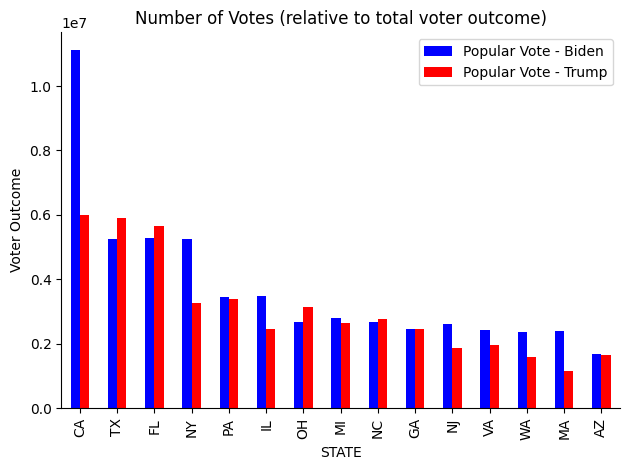

In [66]:
fig, ax = plt.subplots()

largest_pop.plot.bar(x='STATE', y = ['Popular Vote - Biden','Popular Vote - Trump'], color= ['blue','red'], ax = ax)
ax.set_title('Number of Votes (relative to total voter outcome)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Voter Outcome")
ax.grid
fig.tight_layout()

**Looking at the first plot, we can see the number of votes per candidate in the 15 largest states.
In the following plots the blue bars represents vaious results for Condidate Joe Biden and the red bars are for condidate Donald Trump.**

Looking closely the first barplot, we can see that in California Joe Biden won the election by a great margin, while in other major states, apart from New York where Biden was also the clear winner, the election outcome was quite close. It shows how the elections in the United States can be close, even at the popular vote level. However, in the US the electoral vote is designed in a winner takes all way, where the small margins and big margins can be inconsistent. Meaning winning big states by low margin is prefered then winning by a large margin in a single state and losing others.

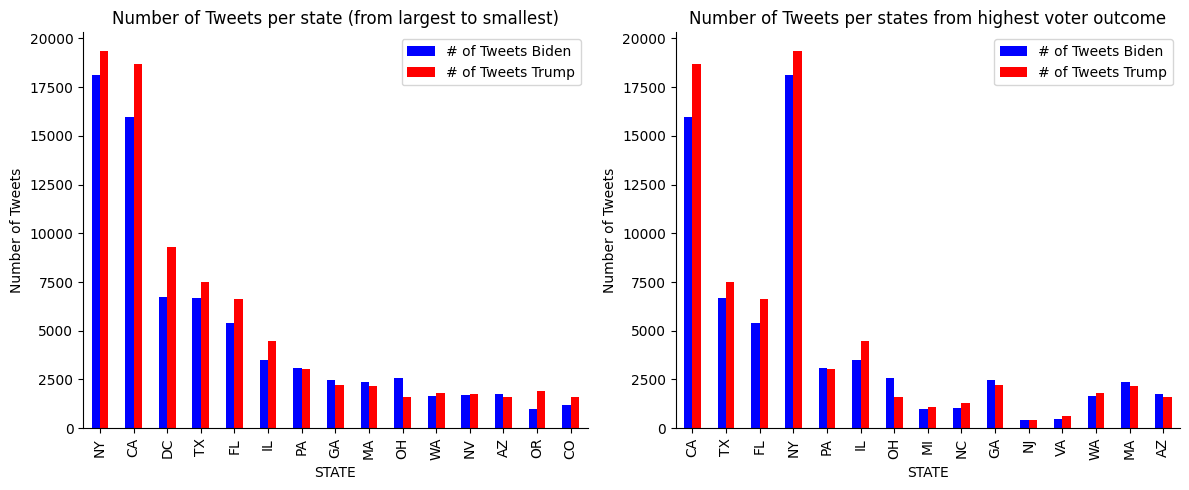

In [67]:
fig, ax = plt.subplots(figsize=(12,5) ,ncols=2, nrows=1)

largest_tweet.plot.bar(x='STATE', y = ['# of Tweets Biden', '# of Tweets Trump'], color= ['blue','red'], ax = ax[0])
ax[0].set_title('Number of Tweets per state (from largest to smallest)')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("Number of Tweets")
fig.tight_layout()

largest_pop.plot.bar(x='STATE', y = ['# of Tweets Biden', '# of Tweets Trump'], color= ['blue','red'], ax = ax[1])
ax[1].set_title('Number of Tweets per states from highest voter outcome')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel("Number of Tweets")
fig.tight_layout()




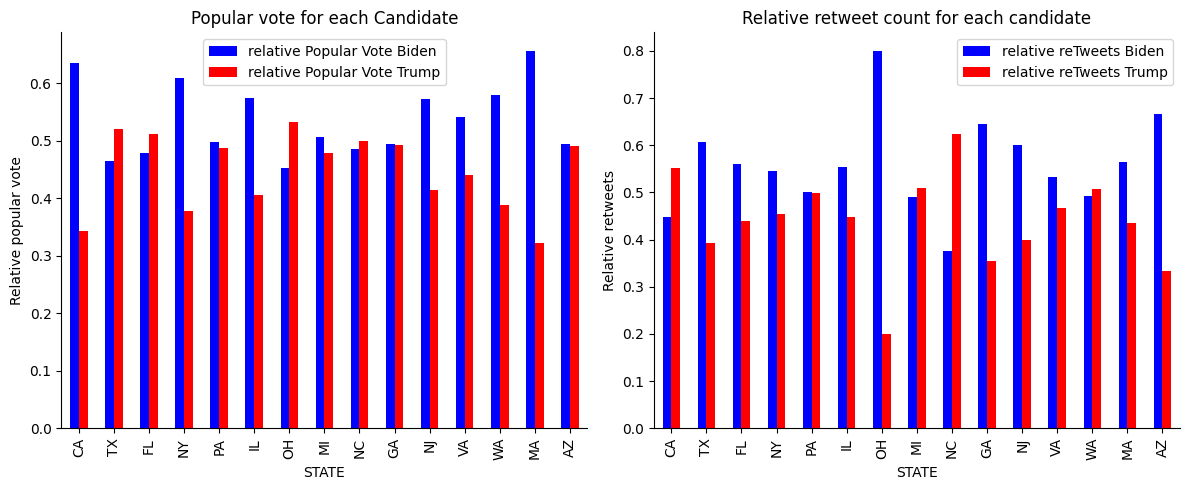

In [68]:
fig, ax = plt.subplots(figsize=(12,5) ,ncols=2, nrows=1)

largest_pop.plot.bar(x='STATE', y = ['relative Popular Vote Biden', 'relative Popular Vote Trump'], color= ['blue','red'], ax = ax[0])
ax[0].set_title('Popular vote for each Candidate')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("Relative popular vote")

fig.tight_layout()

largest_pop.plot.bar(x='STATE', y = ['relative reTweets Biden', 'relative reTweets Trump'], color= ['blue','red'], ax = ax[1])
ax[1].set_title('Relative retweet count for each candidate')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel("Relative retweets")

fig.tight_layout()

The plot on the left shows the relative popular vote for each candidate. We are measuring these variables in relative terms, because this will enable us to have all the data in similar units. The states are the ones with highest voter outcome, in other words where the number of voters were the largest. The plot on the right shows the relative retweets for the same states. Looking at this data, there is no apparent correlation between voter outcome and retweet share. For example in California (CA) voters majority voted for Biden however, the relative vote count shows that tweets about trump had higher relative retweets. On the other hand we can see the inverse for Texas (TX) and many other states. This makes us question, whether the number of retweets can actually predict the voter outcome, especially when we put them in relative terms.

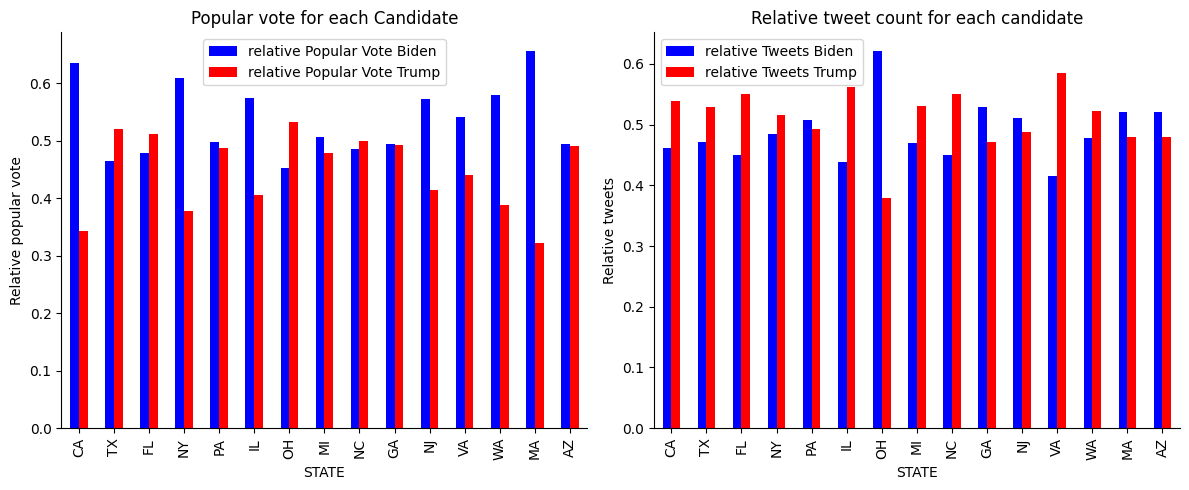

In [69]:
fig, ax = plt.subplots(figsize=(12,5) ,ncols=2, nrows=1)

largest_pop.plot.bar(x='STATE', y = ['relative Popular Vote Biden', 'relative Popular Vote Trump'], color= ['blue','red'], ax = ax[0])
ax[0].set_title('Popular vote for each Candidate')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("Relative popular vote")

fig.tight_layout()

largest_pop.plot.bar(x='STATE', y = ['relative Tweets Biden', 'relative Tweets Trump'], color= ['blue','red'], ax = ax[1])
ax[1].set_title('Relative tweet count for each candidate')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel("Relative tweets")

fig.tight_layout()

Looking at the relative number of Tweets, in the bar plot on the right we can see that the number of tweet data doesn’t seem to show any correlation with actual voter outcome in many large states

In [70]:
outcome1.head().transpose()


,0,1,2,3,4
STATE,AL,AK,AZ,AR,CA
Electoral Vote - Biden,0,0,11,0,55
Electoral Vote - Trump,9,3,0,6,0
Popular Vote - Biden,849624,153778,1672143,423932,11110639
Popular Vote - Trump,1441170,189951,1661686,760647,6006518
Total Popular Vote,2323282,359530,3387326,1219069,17501380
# of Tweets Biden,275,121,1735,66,15960
# of Tweets Trump,293.0,88.0,1602.0,68.0,18673.0
# of Likes Biden,1230.0,251.0,9560.0,88.0,116072.0
# of Likes Trump,1856.0,204.0,3415.0,161.0,106226.0


### The following two bar plots show the number of Tweets in descending order (1) and the second figure shows the number of Tweets in per voter population in each state

Unsurprisingly states with relatively large population has larger share of tweets like New York and California, even if New York actually beats California in Tweets count. What is quite remarkable if we compare the following two figures is the apearance and remarkable size of the state Washington DC, which is absent in our voter outcome data. DC in the United States is not considered a state, so they have no voter input in the election, but as DC is the political capital of the United States, it is usual to see the state raising their voices in political matter like Elections. This is why they are very relavent when we account for number of tweets and retweets, but in the overall election the state does not have any input.


The second barplot as mentioned is  the voter outcome between the largest states by voter outcome (i.e. population) and the number of tweets. 
What we can see is the stark difference in tweet count between CA and NY on one side and TX and FL on the other. This can be explained, because twitter is mostly used among younger population in urban places like CA and NY while social media and twitter is not that popular among older people in rural areas like in TX and FL. 

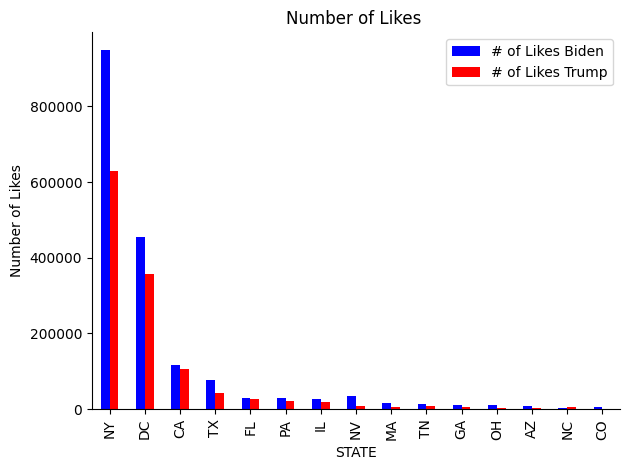

In [71]:
fig, ax = plt.subplots()
largest_like.plot.bar(x='STATE', y = ['# of Likes Biden', '# of Likes Trump'], color= ['blue','red'], ax = ax)
ax.set_title('Number of Likes ')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Number of Likes")
fig.tight_layout()

Finally we also see a very big variation in the number of votes even among the states. There is New York where the majority of the likes stem from, followed by DC but as we move along the state the number of tweets goes towards zero. As we will see further the number of retweets follows ar similar trend. Both of them will be called the level of interactions which is highly correlated with the voter outcome. 

### Scatterplots

In [72]:
main_df.head(4)

,created_at,tweet,likes,retweet_count,user_name,user_join_date,user_followers_count,lat,long,country,state,state_code,Canditate,Coordinates
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,snarke,2007-08-26 05:56:11,1185.0,45.520247,-122.674195,United States of America,Oregon,OR,Donald Trump,POINT (-122.6741949 45.5202471)
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Rana Abtar - رنا أبتر,2009-06-15 19:05:35,5393.0,38.894992,-77.036558,United States of America,District of Columbia,DC,Donald Trump,POINT (-77.0365581 38.8949924)
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Change Illinois | Biden will increase taxes by...,2009-02-02 23:08:28,1396.0,41.875562,-87.624421,United States of America,Illinois,IL,Donald Trump,POINT (-87.6244212 41.875561600000005)
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Ron Burgundy,2020-03-26 23:14:28,496.0,32.717421,-117.162771,United States of America,California,CA,Donald Trump,POINT (-117.1627714 32.7174209)


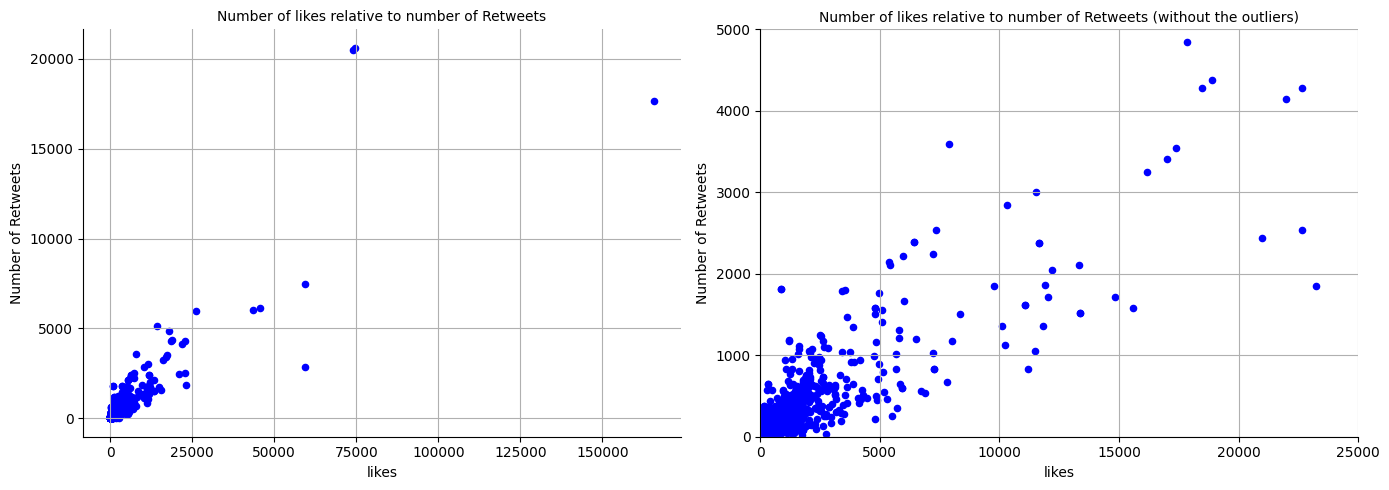

In [73]:
fig, ax = plt.subplots(figsize = (14,5), ncols = 2, nrows=1)


main_df.plot(ax = ax[0], kind="scatter",x="likes", y="retweet_count",color='b')
main_df.plot(ax = ax[1], kind="scatter",x="likes", y="retweet_count",xlim=(0,25000),ylim=(0,5000),color='b')

ax[0].set_title('Number of likes relative to number of Retweets',fontsize=10)
ax[1].set_title('Number of likes relative to number of Retweets (without the outliers)',fontsize=10)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel("Number of Retweets")
ax[0].grid(True)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].grid(True)
ax[1].set_ylabel("Number of Retweets")
fig.tight_layout()

In this scatter plot we can see that the number of retweets and the number of likes in each tweets are highly correlated which means that in our analysis moving forwared we can consider both as the number of interaction in each per tweet. The scale would for sure be different since there are more likes then retweets but the analysis in figuring out the number of interactions and the voter outcome would be the same. 

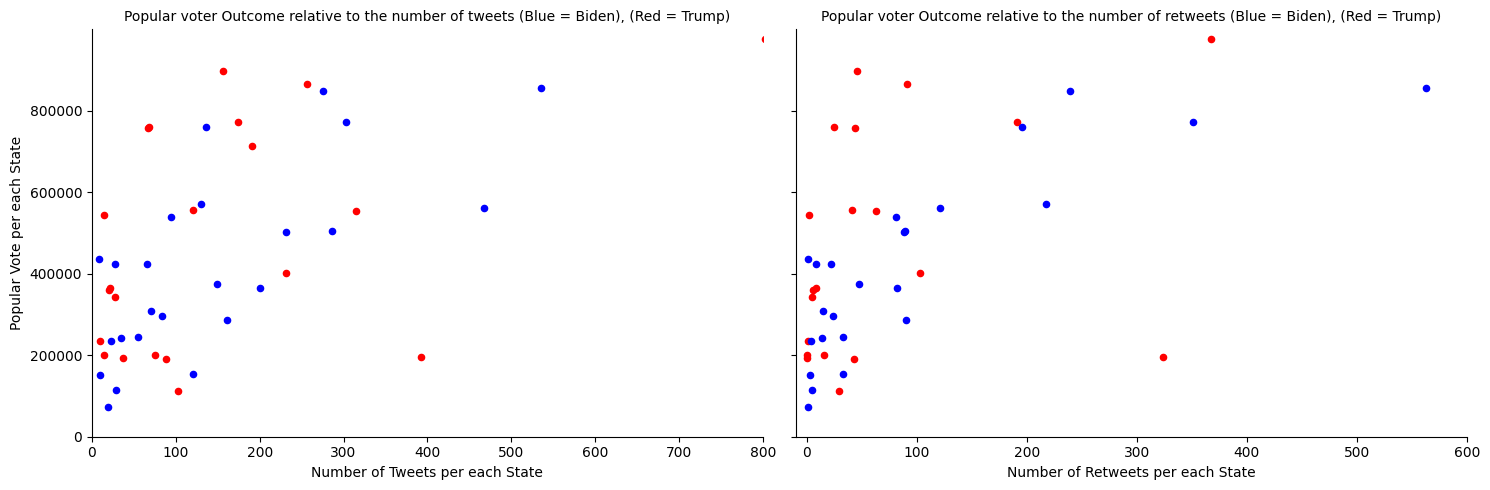

In [74]:
fig, ax = plt.subplots(figsize = (15,5), sharey=True, ncols = 2, nrows=1)


outcome1.plot(ax = ax[0], kind="scatter",y="Popular Vote - Trump", x="# of Tweets Trump",c='r',xlim=(0,800),ylim=(0,120000))
outcome1.plot(ax = ax[0] , kind="scatter",y="Popular Vote - Biden", x="# of Tweets Biden",xlim=(0,800),ylim=(0,120000),color='b')

outcome1.plot(ax = ax[1], kind="scatter",y="Popular Vote - Trump", x="# of retweets Trump",c='r',xlim=(-10,600),ylim=(0,999999))
outcome1.plot(ax = ax[1] , kind="scatter",y="Popular Vote - Biden", x="# of retweets Biden",xlim=(-10,600),ylim=(0,999999),color='b')

ax[0].set_title('Popular voter Outcome relative to the number of tweets (Blue = Biden), (Red = Trump)',fontsize=10)
ax[0].set_xlabel("Number of Tweets per each State")
ax[0].set_ylabel("Popular Vote per each State")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)




ax[1].set_title('Popular voter Outcome relative to the number of retweets (Blue = Biden), (Red = Trump)',fontsize=10)
ax[1].set_xlabel("Number of Retweets per each State")
ax[1].set_ylabel("Popular Vote per State")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
fig.tight_layout()

Above we can see two scatter plots. The red dots are data points for the republican candidate Donald Trump and the blue dots are data points for the democrate party candidate Joe Biden. We have set a limit on the x and y axis because there are outliars which will deform the figure and will make it hard to analyse the datapoints. We were then able to focus our attention to the major trends with the bulk of the data points.

The figure on the left is the number of popular voter outcome relative to the number of tweets per candidate in each state. We can see that there is a positive correlation between the two variable but the correlation seems to be non linear. With the highernumber of tweets we will also get get a higher voter outcome but this trend gets much flatter the closer we get to the number of tweets equal to around 500 

In the figure on the right we can that the y axis is the same but we want to see how the voter outcome comparews with the number of retweets or the number of interactions with the tweet. Here we can see that there is a similar story as the figure on the right but the trends are much more pronounced. We can see that the correlation is positive and even more non linear.

These scatter plots shows that there is a correlation between the number of tweets and interation to those tweets and voter outcome but this correlation is non linear. After a certain number of tweets or retweets there is no positive association between our twitter data and the voter outcome

# Project 2

## Maps and Interpretations

### Loading and cleaning map data

We are first loading data to be able to plot The Continental United States. We can find the data at the official website at US Census Data which can be found at: https://www.census.gov/
We will then clean and manipulate the data to be able to plot it through GeoPandas workframe

Since we are mainly interested in the Continental US data we will exclude certain states like Alaska, Hawai. This is because when plotting the maps they distort the map because of their distance to the continental US. Moreover, since these are small states, population wise, they have relatively small impact on voter outcome. This means that droping these data will not create major biasis in our analysis.

In [75]:
USA = gpd.read_file("/Users/maseehfaizan/Desktop/tl_2022_us_state/tl_2022_us_state.shp")
USA.head(4)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."


In [76]:
USA["Coordinates"] = list(zip(USA.INTPTLON, USA.INTPTLAT))
USA["Coordinates"] = USA["Coordinates"].apply(Point)

In [77]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']

for i in non_continental:
    USA = USA[USA.STUSPS != i]

In this part we are merging our **USA** data where we have all the geographical information of the continental US with **outcome1** data where we have been collecting and analysing twitter and voter outcome data.
This will make it easier to plot our analysis done in project one into visual US map

In [78]:
USA_w_outcome = USA.merge(outcome1, left_on='STUSPS', right_on='STATE',how='left')
USA_w_outcome.head(4)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,Total # of likes,Total # of reTweets,relative Tweets Biden,relative Tweets Trump,relative Likes Biden,relative Likes Trump,relative reTweets Biden,relative reTweets Trump,relative Popular Vote Trump,relative Popular Vote Biden
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,38.0,6.0,0.621622,0.378378,0.763158,0.236842,0.666667,0.333333,0.686247,0.296936
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,57539.0,20427.0,0.450220,0.549780,0.515181,0.484819,0.561267,0.438733,0.512198,0.478615
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,47431.0,11201.0,0.438634,0.561366,0.596867,0.403133,0.552986,0.447014,0.405534,0.575416
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,3831.0,1007.0,0.513342,0.486658,0.659358,0.340642,0.731877,0.268123,0.452849,0.523951


We first want to plot the actual Electoral outcome to show the states who voted for Trump in Red and those who voted for Biden in Blue.

In [79]:
USA['Republican'] = np.where((USA_w_outcome['Electoral Vote - Trump'] > USA_w_outcome['Electoral Vote - Biden']),USA_w_outcome['STATE'],np.nan)

In [80]:
USAR = USA.dropna()

In [81]:
name = gpd.GeoDataFrame(USA, geometry="Coordinates")

## The Message

The main message in our data is that the number of interactions that people have with tweets of each candidate, for example likes and retweets, of is correlated with the voter outcome, throughout the country. With Tweets about biden are getting more likes and retweets and which is consistent with him winning the overall election
Looking into the the content of the tweets there is a big proportion of it that is not necessairly positive. When looking at geographic level, we see that the correlation between voter outcome and number of likes and retweets vanishes at the state leve.  Our data suggests that throughout the country, with few exceptions, Biden overwhelmingly beats trump in every state if we look at Twitter Data soley. There might be biasis coming from different areas. First it might be that the social media platform Twitter might be more biased towards Biden then Trump, since a lot of young and urban people use the platform. On the other hand the tweets about Biden can be negative which is then retweeted more intensively throughout the countries. We need further refinement in our analysis to pin down the biasis.



**What follows are heat maps of the continental US where the more red a state is, the more the output corresponds to Trump and the Blue states represent output for Joe Biden.**

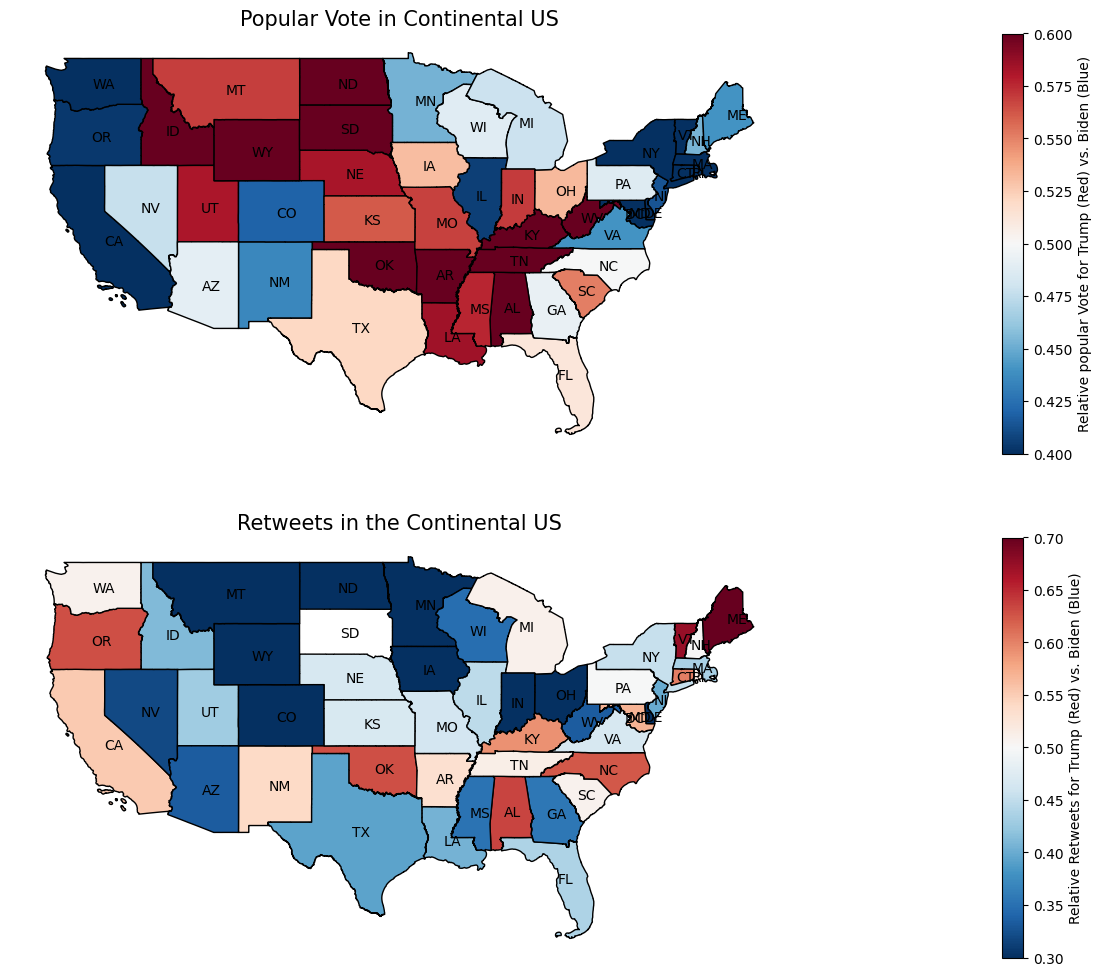

In [82]:
fig, hax = plt.subplots(figsize = (55,12), ncols=1,nrows=2)

# Plot the state
#USA.plot(ax=gax, edgecolor='black',color='white')

USA_w_outcome.plot(ax=hax[0], column = 'relative Popular Vote Trump' ,edgecolor = 'Black',
                   legend=True,legend_kwds={'label':'Relative popular Vote for Trump (Red) vs. Biden (Blue)'}, cmap='RdBu_r',
                    vmin=0.4, vmax=0.6)

USA_w_outcome.plot(ax=hax[1],column = 'relative reTweets Trump' ,edgecolor = 'Black',legend=True,
                   legend_kwds={'label':'Relative Retweets for Trump (Red) vs. Biden (Blue)'}, cmap='RdBu_r',
                    vmin=0.3, vmax=0.7)


hax[0].set_title('Popular Vote in Continental US',fontsize=15)
hax[1].set_title('Retweets in the Continental US',fontsize=15)

hax[0].axis('off')
hax[1].axis('off')

for x, y, label in zip(name['Coordinates'].x, name['Coordinates'].y, name['STUSPS']):
    hax[0].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')
    hax[1].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')

Having a visual representation of the continental US with the heatplots surprisingly show an opposite correlation between the relative number of retweets and relative popular voter outcome. States where people generally voted for Trump were more likely to retweet or share the tweets about Biden and vise versa. For example California and Texas. These two states have large population and large electoral college vote. We can see that in California, people mostly voted for Biden but the relative retweet count shows that they, were also the ones retweeting most about Trump. The inverse is True for Texas or a swing state like Florida. I believe that further analysis is needed interms of the content of those tweets, which is not done in this version of analysis, to understand the content of of those tweets. We want to see whether those tweets were positive or negative to each candidate and weight them accordingly. 

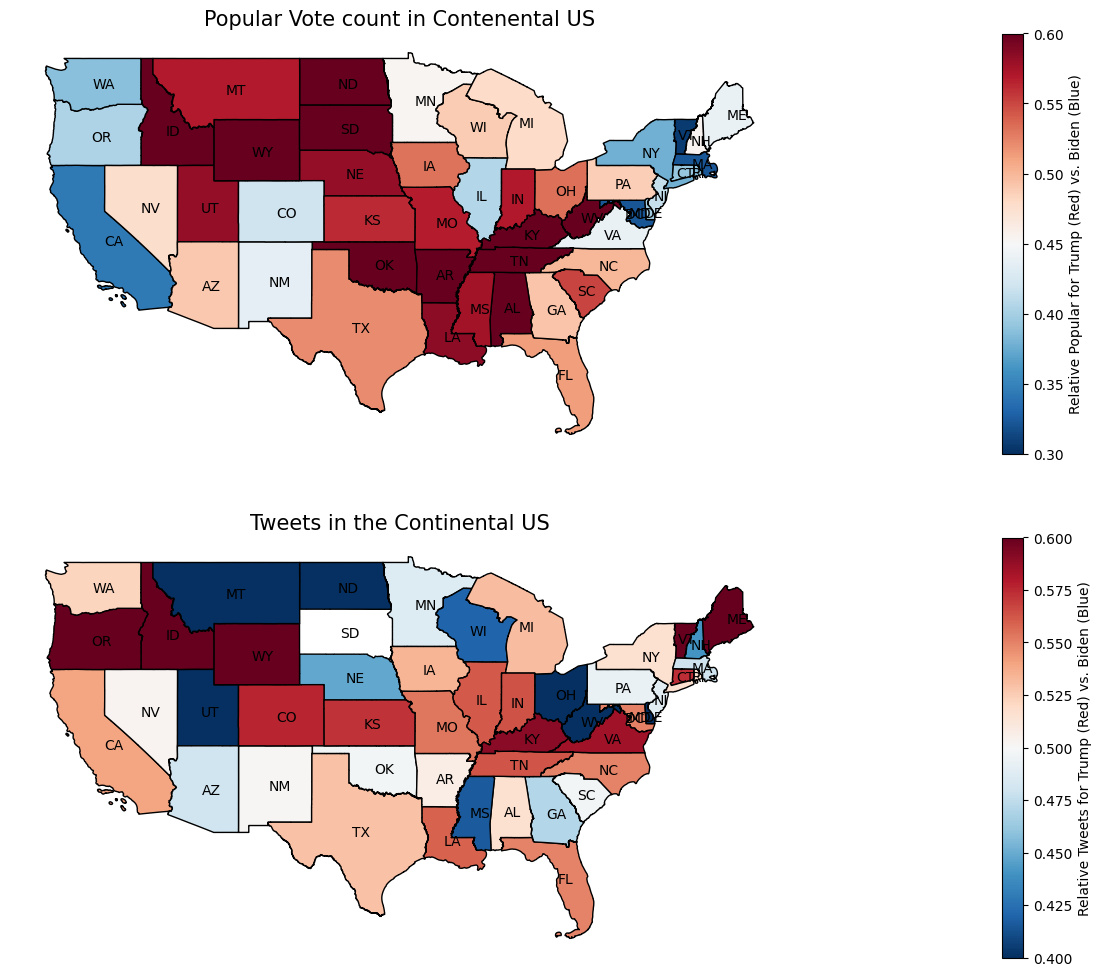

In [83]:
fig, hax = plt.subplots(figsize = (55,12), ncols=1,nrows=2)

# Plot the state
#USA.plot(ax=gax, edgecolor='black',color='white')
USA_w_outcome.plot(ax=hax[0], column = 'relative Popular Vote Trump' 
                   ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Popular for Trump (Red) vs. Biden (Blue)'},
                   cmap='RdBu_r',vmin=0.3, vmax=0.6)
USA_w_outcome.plot(ax=hax[1],column = 'relative Tweets Trump' 
                   ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Tweets for Trump (Red) vs. Biden (Blue)'}, 
                   cmap='RdBu_r', vmin=0.40, vmax=0.60)

hax[0].set_title('Popular Vote count in Contenental US'
                 ,fontsize=15)
hax[1].set_title('Tweets in the Continental US'
                 ,fontsize=15)

hax[0].axis('off')
hax[1].axis('off')
for x, y, label in zip(name['Coordinates'].x, name['Coordinates'].y, name['STUSPS']):
    hax[0].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')
    hax[1].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')

**As mensioned earlier the tweet count is very inconsistent with the actual voter outcome. There is no correlation or insight that are seen and found in these heat maps** 
We want to learn more about the content of these tweets and whether they were positive or negative news about the candidate in question. It is likely that people tweet and share more negative news about the opposing candidate which makes the retweet count negatively correlated with the actual voter outcome.

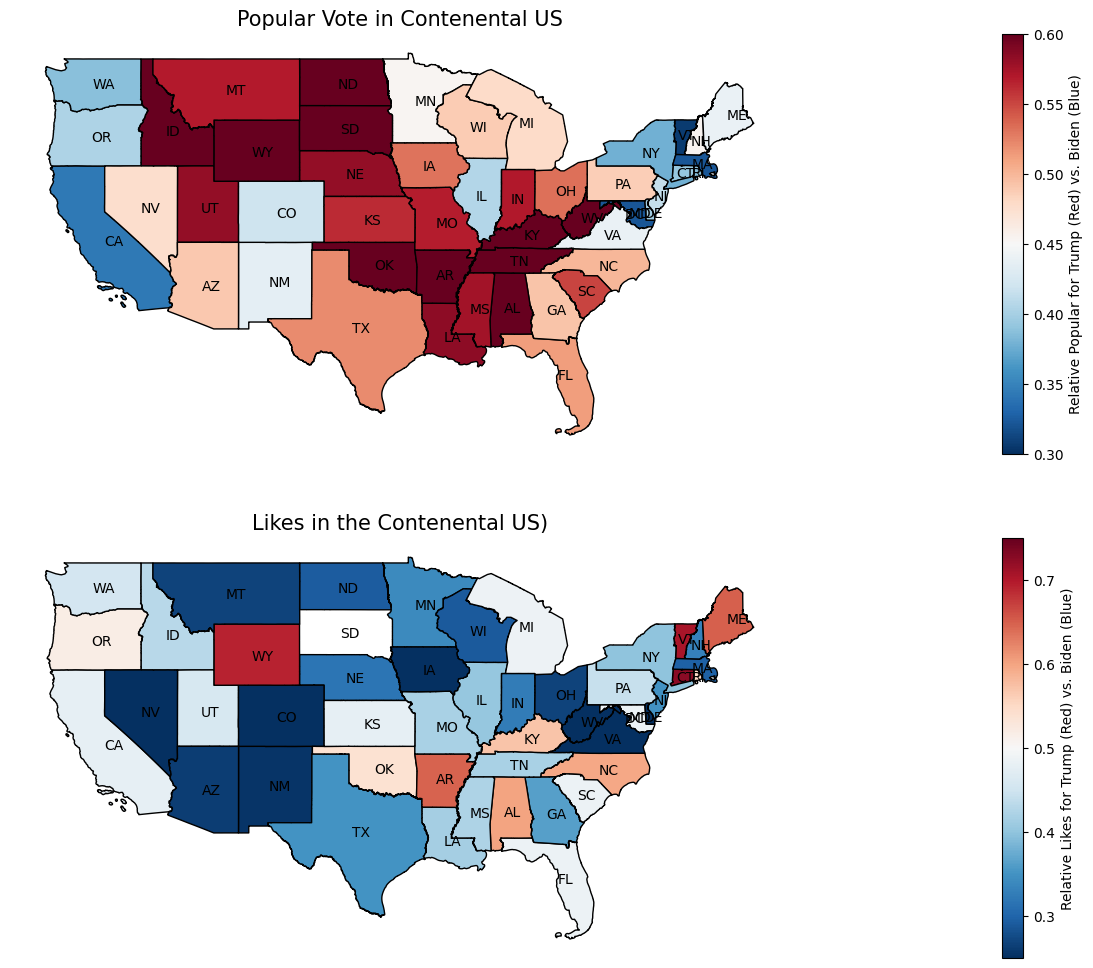

In [84]:
fig, hax = plt.subplots(figsize = (55,12), ncols=1,nrows=2)

# Plot the state
#USA.plot(ax=gax, edgecolor='black',color='white')
USA_w_outcome.plot(ax=hax[0], column = 'relative Popular Vote Trump' 
                   ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Popular for Trump (Red) vs. Biden (Blue)'},
                   cmap='RdBu_r', vmin=0.3, vmax=0.6)
USA_w_outcome.plot(ax=hax[1],column = 'relative Likes Trump' ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Likes for Trump (Red) vs. Biden (Blue)'},
                   cmap='RdBu_r',vmin=0.25, vmax=0.75)

hax[0].set_title('Popular Vote in Contenental US'
                 ,fontsize=15)
hax[1].set_title('Likes in the Contenental US)'
                 ,fontsize=15)

hax[0].axis('off')
hax[1].axis('off')
for x, y, label in zip(name['Coordinates'].x, name['Coordinates'].y, name['STUSPS']):
    hax[0].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')
    hax[1].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')


Finally looking at the number of likes data, we see that on tweets about biden gets a much higher number of traction. Looking at these results visually we want to know why is it that on Twitter Biden gets higher number of likes, even in the states where trump get higher popular votes. For example the major states like California and New York people liked more of Biden’s tweets and voted for biden but even in red states like Texas Utah or Nevada, people were interacting more with Biden’s tweets then Trump’s. We can not forget about the sentiment analysis mentioned above, but we can also hypothesis the fact that *any publicity is good publicity* meaning even getting higher likes, for negative tweets gets people’s attention and in turn makes you win election. This analysis is true at the country level not the state level

# Project 3

## Potential data to scrape.

As mentionned earlier, our data is soely coming from Twitter platform which is very popular among certain demographic and not the whole population. This creates certain bias in our analysis. Mainly the fact that since Twitter is popular among young and urban population, our analysis is only considering their views.

To remedie this problem it would be advantageous to our analysis, to get a richer a varied dataset from other social media platform that are popular among other demographic. **Facebook** is one such candidate, where if we could collect the data from https://www.facebook.com, from the same time period, and merge with our existing Twitter data, will enrich emensly our analysis. The other social website where we could scrappe data would be **reddit** https://www.reddit.com.

We can also find useful facts about each state and their socio-economic situation relative to others. In doing so we might be able to find voting patterns among the population other then their social media activity, which will help us remedie the bias problem.

## Potential Challenges

There are multiple hurdles that were encountered when scraping particular datasets.

First of all, **Facebook** has very strict webscrapping policies. It is not allowed to use any HTML, Javascript or Python script to scrape their website as mentioned on their *Terms of Service* documentation: https://developers.facebook.com/docs/development/terms-and-policies/automated-data-collection/ An API can be bought from Facebook but is not freely available. 

Moreover, it is possible to scrape **reddit** data through fairly easy using praw liberary from python mainly praw https://praw.readthedocs.io/en/latest/. The problem arises when we want to find the right subreddit and most imprtantly find the data for **the right date-time which is year 2020** in our case. To scrape enough data similar to Twitter data, and filter throught the same time frame and Reddits mentionning the two Candidate need a higher set of computing power then what I have in disposale right now. The idea is having similar data as Twitter, where we will be able to analyse the number of like and shares (in the case of facebook) and the number of upvotes in reddit, to see whether theere is a correlation between those metric and voter outcome or the Twitter data is generalizable across social media. We sould most likely scrape the data from the same time  frame

Finally, it is possible to scrape Data from a Website and get simple facts about each state and analyise that data alongside our Twitter data.


## Scraping Data from a Website

We will start by scraping data from wikipedia webpage showing the list of US States, ranked by per capita income on the following url: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income I will mainly focus on the 3rd table on the website.

We are then looking for the status code to see whether python was able to open the requested url successfully. The code 200 means that the request was successful. 


In [85]:
web_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income'
response = requests.get(web_url)

print('Status code\n', response.status_code)

Status code
 200


In [86]:
soup_object = BeautifulSoup(response.content)

We are first collecting all the tables on the page with class name 'wikitable' and collect the Data from the 3rd table which is at index 2. Further more we are collecting data from each table row 'tr' and collecting the text values.

In [87]:
data_table = soup_object.find_all('table', 'wikitable')[2]

In [88]:
all_values = data_table.find_all('tr')

We are just checking weather we chose the correct table and can retrieve the information. 

In [89]:
all_values[1].find_all('td')[1].text

'\xa0United States\n'

We are storing all the data points in a Pandas DataFrame calles *US_income* with the following Columns
- Rank
- State or Territory
- Per capita income (2019) ACS, (ACS is the source from which wikipedia collected this data)
- Per capita income (2020) BEA (BEA is the source from which wikipedia collected this data)
- Of which diposable personal income (2020)
- Median household income (2019)
- Median family income (2019)
- Population (April 2020)
- Number of Households (2019)
- Number of families (2019)

HTML code has '\n' on each cell or the text to render on multiple lines in the cell but is not needed in our Pandas DataFrame. That is why we will be removing that part from the cell. Further more we are storing all the data from the tabl einto a pandas dataframe called US_income.

In [90]:
US_income = pd.DataFrame(columns = ['Rank','State or Territory',
                                            'Per capita income (2019) ACS',
                                            'Per capita income (2020) BEA',
                                            'Of which diposable personal income (2020)',
                                           'Median household income (2019)',
                                            'Median family income (2019)',
                                           'Population (April 2020)',
                                            'Number of Households (2019)',
                                            'Number of families (2019)'])
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Rank = values[0].text.replace('\n',' ')
    State = values[1].text.replace('\n',' ')
    Income19 = values[2].text.replace('\n',' ')
    Income20 = values[3].text.replace('\n',' ')
    Dincome20 = values[4].text.replace('\n',' ')
    Median_Hincome = values[5].text.replace('\n',' ')
    Median_Fincome = values[6].text.replace('\n',' ')
    Population = values[7].text.replace('\n',' ')
    Number_housholds19 = values[8].text.replace('\n',' ')
    Number_families19 = values[9].text.replace('\n',' ')
    
    
    US_income.loc[ix] = [Rank,State, Income19, Income20,
                         Dincome20,
                                Median_Hincome, Median_Fincome,
                                Population, Number_housholds19,
                                 Number_families19] 
    ix += 1

In [91]:
US_income.head(4)

,Rank,State or Territory,Per capita income (2019) ACS,Per capita income (2020) BEA,Of which diposable personal income (2020),Median household income (2019),Median family income (2019),Population (April 2020),Number of Households (2019),Number of families (2019)
0,,United States,"$35,672","$59,510","$52,853","$65,712","$80,944","335,073,176","122,802,852","79,594,270"
1,1,"Washington, D.C.","$59,808","$86,567","$73,568","$92,266","$130,291","689,545","291,570","124,978"
2,2,Massachusetts,"$46,241","$78,458","$66,978","$85,843","$108,348","7,029,917","2,650,680","1,665,005"
3,3,Connecticut,"$45,359","$78,609","$67,110","$78,833","$101,272","3,605,944","1,377,166","885,911"


Before mergin the dataset to our main dataset of analysis **outcome1** we need to standardise the naming scheme of each state for example DC. by removing extra dot, comas and spaces. Also storing the datain a csv file.

In [92]:
US_income['State or Territory'] = US_income['State or Territory'].str.replace(',','')
US_income['State or Territory'] = US_income['State or Territory'].str.replace('.','')
US_income['State or Territory'] = US_income['State or Territory'].str.strip()

/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/1997181413.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  US_income['State or Territory'] = US_income['State or Territory'].str.replace('.','')


In [93]:
US_income.to_csv('US_income.csv', index=False)

Our **outcome1** dataset categorizes values by state code and there is not a column with state code values. This is why we will scrape another table with *state name* and *state code* found on the following url: https://knowledgecenter.zuora.com/Quick_References/Country%2C_State%2C_and_Province_Codes/B_State_Names_and_2-Digit_Codes
.All of the code used is similar as before. We will call this dataset **State_name** merge it with **US_income** and finally merge the final version of US_income dataset with **outcome1**

In [94]:
web_url = 'https://knowledgecenter.zuora.com/Quick_References/Country%2C_State%2C_and_Province_Codes/B_State_Names_and_2-Digit_Codes'
response = requests.get(web_url)

print('Status code\n', response.status_code)

Status code
 200


In [95]:
soup_object = BeautifulSoup(response.content)

In [96]:
data_table1 = soup_object.find_all('table', 'zebra')[0]

In [97]:
all_values1 = data_table1.find_all('tr')

In [98]:
all_values1[1].find_all('td')[0].text

'AA'

In [99]:
State_name = pd.DataFrame(columns = ['State','Name'])
ix = 0 

for row in all_values1[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    State = values[0].text.replace('\n',' ')
    Name = values[1].text.replace('\n',' ')

    
    
    State_name.loc[ix] = [State, Name] 
    ix += 1

In [100]:
State_name.head(4)

,State,Name
0,AA,Armed Forces America
1,AE,Armed Forces
2,AK,Alaska
3,AL,Alabama


In [101]:
State_name['Name'] = State_name['Name'].str.strip()
State_name['State'] = State_name['State'].str.strip()

## Merging the Scraped Dataset

The State_name has extra values for Armed Forces and other terretories which we are going to drop before merging with outcome1. This is a precautionary measure since when we mearge with outcome1 on the outerlevel it would automatically drop.
Since now Column: Name, and Column State or Territory are the same we will correct for the redundancy and drop one of the column (State or Territory) 

In [102]:
US_income = US_income.merge(State_name,
                            left_on = "State or Territory", 
                            right_on = "Name", how= 'left')

In [103]:
US_income = US_income.drop('State or Territory', axis = 1)

We are now merging all the data scrapped earlier with our datafram with all our analysis: outcome1 and our main Twitter data: main_df. We are merging on state code name droping all the state codes not existing in US_income and making sure we don't lose any data in our main dataframes.

In [104]:
outcome1 = outcome1.merge(US_income, left_on = "STATE", right_on = "State", how= 'left')

In [105]:
main_df = main_df.merge(US_income, left_on = 'state_code' , right_on = 'State', how = 'left')

In [106]:
outcome1 = outcome1.drop('State',axis =1)

In order to do any meaning full analysis, we need to clean our variables, namely remove the dollar sign and extra comas and turn the values into intigers.
First we are turning the cell into a string variable, make the necessary changes, removing comas and dollar and finally turnthe cenn into and intiger so we can make the necessary computations.

In [107]:
change = ['Per capita income (2019) ACS',
          'Per capita income (2020) BEA',
          'Of which diposable personal income (2020)',
        'Median household income (2019)',
          'Median family income (2019)',
          'Population (April 2020)',
          'Number of Households (2019)',
         'Number of families (2019)']

for i in change:
    outcome1[i] = outcome1[i].astype(str)
    outcome1[i] = outcome1[i].str.strip()
    outcome1[i] = outcome1[i].str.replace('$','')
    outcome1[i] = outcome1[i].str.replace(',','')
    outcome1[i] = outcome1[i].astype(int)
        


/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/625092982.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  outcome1[i] = outcome1[i].str.replace('$','')


In [108]:
change = ['Per capita income (2019) ACS',
          'Per capita income (2020) BEA',
          'Of which diposable personal income (2020)',
        'Median household income (2019)',
          'Median family income (2019)',
          'Population (April 2020)',
          'Number of Households (2019)',
         'Number of families (2019)']

for i in change:

    main_df[i] = main_df[i].astype(str)
    main_df[i] = main_df[i].str.strip()
    main_df[i] = main_df[i].str.replace('$','')
    main_df[i] = main_df[i].str.replace(',','')
    main_df[i] = main_df[i].str.replace('N/A','0')
    main_df[i] = main_df[i].astype(int)

/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/2750579311.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  main_df[i] = main_df[i].str.replace('$','')


In [109]:
outcome1.head().transpose()

,0,1,2,3,4
STATE,AL,AK,AZ,AR,CA
Electoral Vote - Biden,0,0,11,0,55
Electoral Vote - Trump,9,3,0,6,0
Popular Vote - Biden,849624,153778,1672143,423932,11110639
Popular Vote - Trump,1441170,189951,1661686,760647,6006518
Total Popular Vote,2323282,359530,3387326,1219069,17501380
# of Tweets Biden,275,121,1735,66,15960
# of Tweets Trump,293.0,88.0,1602.0,68.0,18673.0
# of Likes Biden,1230.0,251.0,9560.0,88.0,116072.0
# of Likes Trump,1856.0,204.0,3415.0,161.0,106226.0


## Visualizing Scraped dataset

Before visualizing the new data set, we first need to make some computation on the total income per capita to normalize everything to the same units. We will mainly consider 2020 data which is given in the column 'Per capita income (2020) BEA'

In [110]:
total_income_cap = outcome1['Per capita income (2020) BEA'].sum()

In [111]:
outcome1['Relative_income'] = outcome1['Per capita income (2020) BEA']/total_income_cap

In [112]:
largest_income = outcome1.nlargest(15,['Per capita income (2020) BEA'])
smallest_income = outcome1.nsmallest(15,['Per capita income (2020) BEA'])
smallest_income = smallest_income.iloc[::-1]
largest_income = largest_income.iloc[::-1]

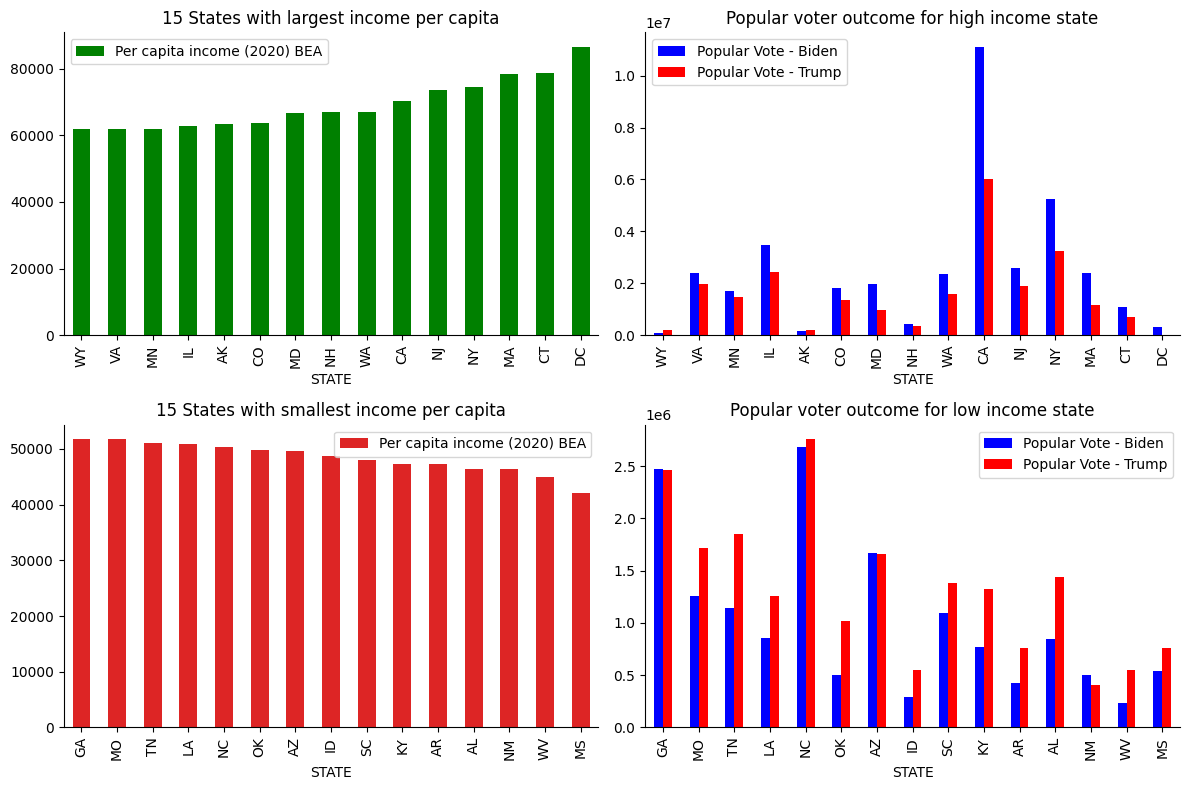

In [113]:

fig, ax = plt.subplots(figsize=(12,8) ,ncols=2, nrows=2)





largest_income.plot.bar(x='STATE', y = ['Per capita income (2020) BEA'], color= ['Green'], ax = ax[0][0])
ax[0][0].set_title('15 States with largest income per capita')
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
fig.tight_layout()

largest_income.plot.bar(x='STATE', y = ['Popular Vote - Biden','Popular Vote - Trump'], color= ['blue','red'], ax = ax[0][1])
ax[0][1].set_title('Popular voter outcome for high income state')
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
fig.tight_layout()


smallest_income.plot.bar(x='STATE', y = ['Per capita income (2020) BEA'], color= ['#dd2525'], ax = ax[1][0])
ax[1][0].set_title('15 States with smallest income per capita')
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
fig.tight_layout()

smallest_income.plot.bar(x='STATE', y = ['Popular Vote - Biden','Popular Vote - Trump'], color= ['blue','red'], ax = ax[1][1])
ax[1][1].set_title('Popular voter outcome for low income state')
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
fig.tight_layout()



These figure shows us multiple things. First of all, income per capita is quite similar across top states. In the top left figure we can see as the income per capita increase among the top income states, so does the vote share of Biden relative to Trump. For example in California (CA), New York (NY), and Washington DC (DC). On the other side of the coin, looking at the two bottom figure. We can see that among the low income states as the income level drops, the voter outcome for Trump rises. For example Alabama (AL), Mississippi (MS) etc. The following figure will show how this relates to our Twitter data. 


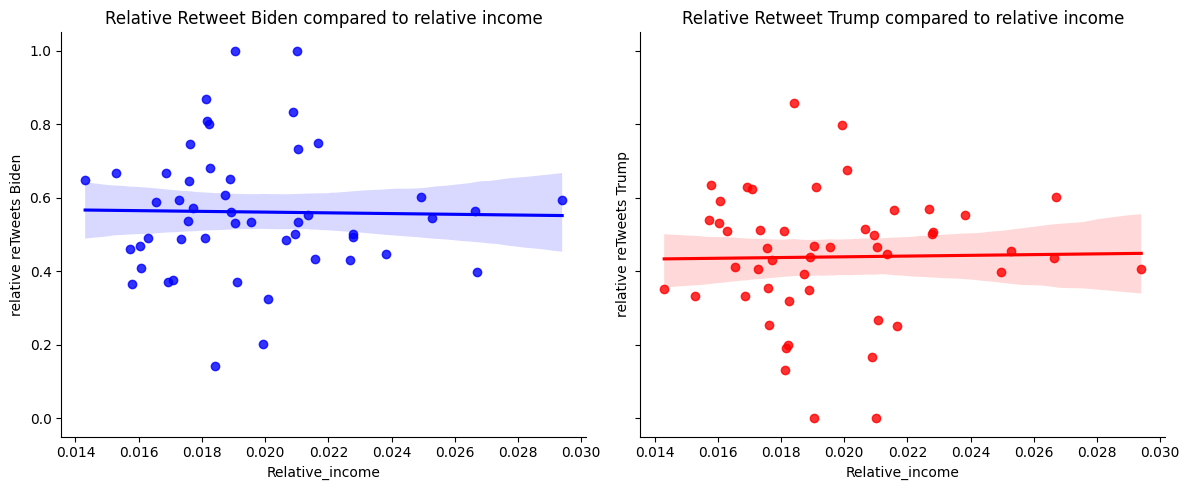

In [114]:
fig, ax = plt.subplots(figsize=(12,5), sharey = True ,ncols=2, nrows=1)


sns.regplot(x='Relative_income', y='relative reTweets Biden', data= outcome1, ax=ax[0], color='Blue')
sns.regplot(x='Relative_income', y='relative reTweets Trump', data= outcome1, ax=ax[1], color = 'red')



ax[0].set_title('Relative Retweet Biden compared to relative income')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
fig.tight_layout()

ax[1].set_title('Relative Retweet Trump compared to relative income')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
fig.tight_layout()



The largest income states, like California, New York and Washington DC, have a higher interaction with tweets mentioning Biden as seen before. Here however, we will look into the lower income state and see weather a similar pattern is true for Trump. We want to check weather as the income level drops, does the number of interaction (i.e. retweets) for trump rises relative to Biden. The barplot above we can see that for most of the low income states like Alabama (AL) or Tennesse (TN) the number of retweets does correlate with the voter outcome for Trump. The higher the the retweet count for Trump, the higher voter outcome. This analysis shows, that when comparing twitter analytics data, we should always control for socio-economic factors such as income aswell.

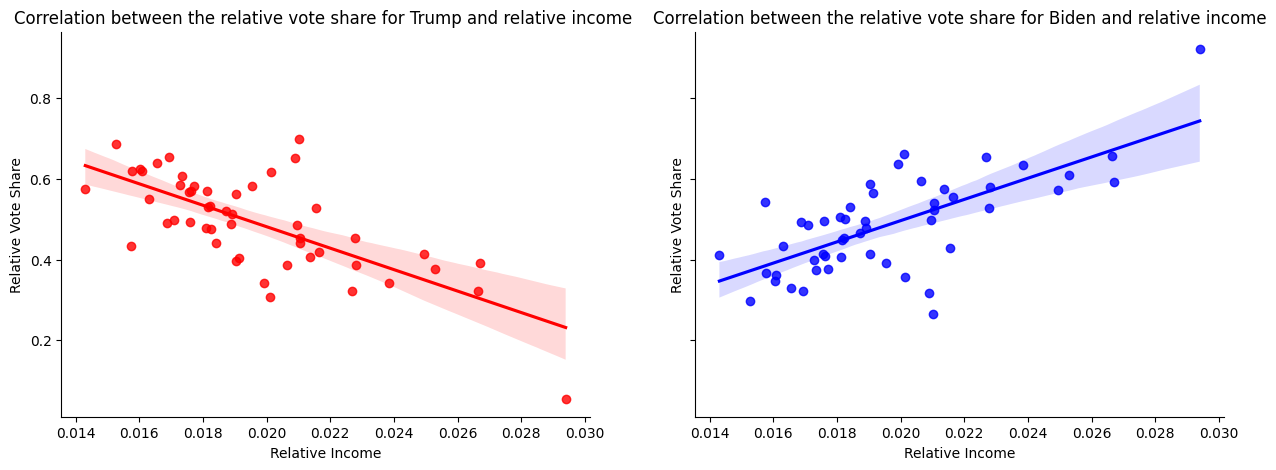

In [115]:
fig, ax = plt.subplots(figsize = (15,5), sharey=True, ncols = 2, nrows=1)

sns.regplot(x='Relative_income', y='relative Popular Vote Trump', data= outcome1, ax=ax[0], color='red')
sns.regplot(x='Relative_income', y='relative Popular Vote Biden', data= outcome1, ax=ax[1], color = 'blue')



ax[0].set_title('Correlation between the relative vote share for Trump and relative income ',fontsize=12)
ax[0].set_xlabel("Relative Income")
ax[0].set_ylabel("Relative Vote Share")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_title('Correlation between the relative vote share for Biden and relative income',fontsize=12)
ax[1].set_xlabel("Relative Income")
ax[1].set_ylabel("Relative Vote Share")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)






The Scatterplot above shows relative income with respect to relative vote share for both candidates. Trump in Red and Biden in Blue. This plot will serve as a proxy for difference in rural and urban voter outcome. Here the assumption is that lower income individuals are more likely wto live in a rural area relative to high income individuals, who might live in urban areas.
The scatter plot on the left shows the relative vote share of Trump compared to relative income for each state. We can see that the correlation is negative, which means states with higher income per capita are less likely to vote for Trump and as a consequence vote for Biden. Since all the terms are in relative terms and there are only two condidatesm the relative voter share compare to relative income per capita is the opposite of Trump, where high income states are more likely to vote for Biden rather then Trump. 

In [116]:
USA_w_outcome = USA.merge(outcome1, left_on='STUSPS', right_on='STATE',how='left')

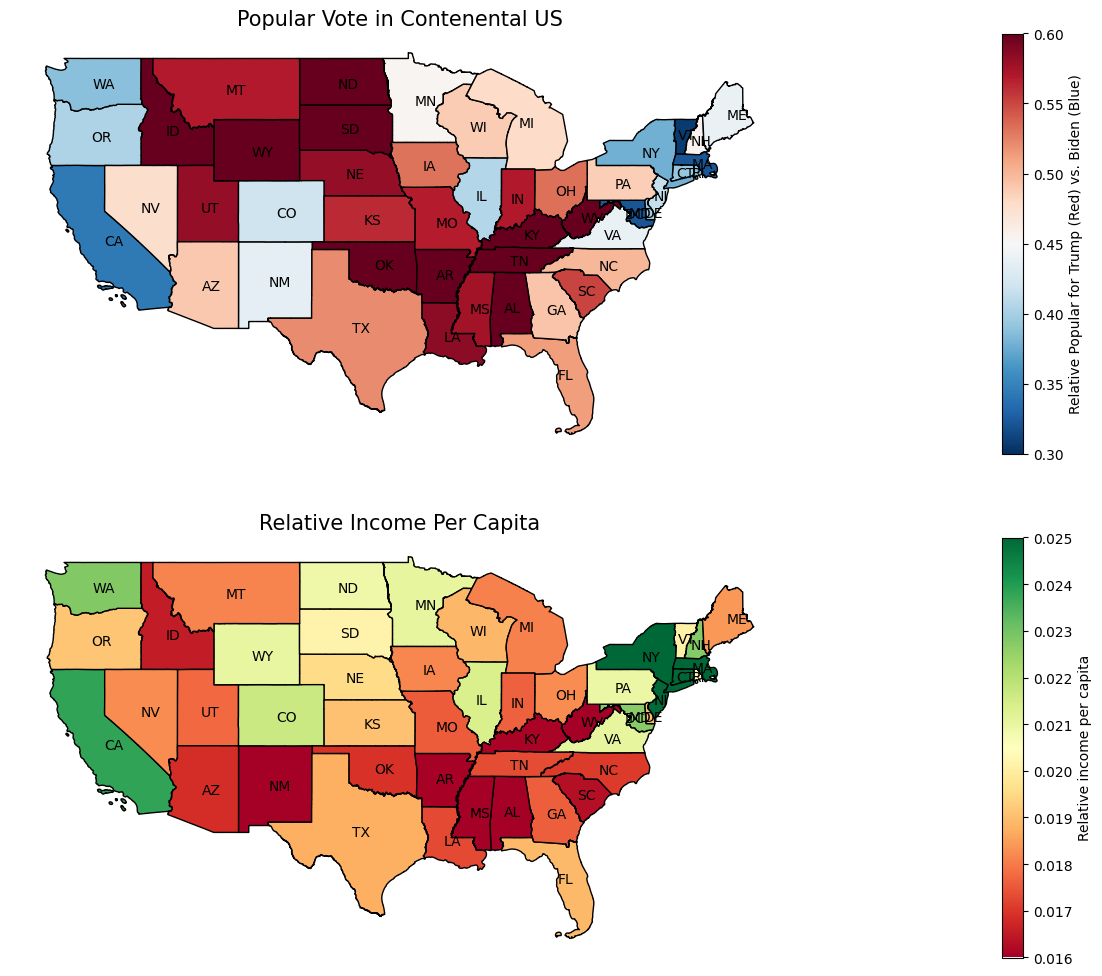

In [117]:
fig, hax = plt.subplots(figsize = (55,12), ncols=1,nrows=2)

# Plot the state
#USA.plot(ax=gax, edgecolor='black',color='white')
USA_w_outcome.plot(ax=hax[0], column = 'relative Popular Vote Trump' 
                   ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Popular for Trump (Red) vs. Biden (Blue)'},
                   cmap='RdBu_r',vmin=0.3, vmax=0.6)
USA_w_outcome.plot(ax=hax[1],column = 'Relative_income' ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative income per capita'},
                   cmap='RdYlGn',vmin=0.016, vmax=0.025)

hax[0].set_title('Popular Vote in Contenental US'
                 ,fontsize=15)
hax[1].set_title('Relative Income Per Capita'
                 ,fontsize=15)

hax[0].axis('off')
hax[1].axis('off')
for x, y, label in zip(name['Coordinates'].x, name['Coordinates'].y, name['STUSPS']):
    hax[0].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')
    hax[1].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')

To complete our visual analysis of how relative income correlates with voter outcome and therefor the number of twitter interaction mentioning each candidate, we will look into heat map above. The map shows that high income States like California (CA) or New York (NY)  are more likely to vote Biden and low income states like Alabama (AL) or Tennessee (TN) more likely to vote Trump.

## Adding new dataset

As we know this election was very contravartial because it happened during a pandemic of COVID-19 and when there were widespread lockdowns around the US. We also know that during this time of lockdown people’s only was of communicating was through online platform like Twitter. The new data set is about weekly COVID-19 and contamination and Death’s in the US. We will look how it relates to Twitter use and by extension the election outcome. 
This data can be found on CDC's website :https://covid.cdc.gov/covid-data-tracker/#cases_casesper100k

In [118]:
COVID = pd.read_csv('/Users/maseehfaizan/Desktop/data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED-2.csv')

In [119]:
COVID.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [120]:
COVID.count()

submission_date    60060
state              60060
tot_cases          60060
conf_cases         34034
prob_cases         33962
new_case           60060
pnew_case          56534
tot_death          60060
conf_death         33273
prob_death         33273
new_death          60060
pnew_death         56566
created_at         60060
consent_cases      50045
consent_deaths     51051
dtype: int64

There are a lot of column with valuable data that would not be useful for our analysis purposes. We are droping all the columns except
- When the data was submitted : submission_date
- The State code : state
- Total Cases in each state : tot_cases
- New Cases in each state : new_cases
- Total death due to COVID in each state : tot_death
- New deaths from previous periond in each state : new_death

In [121]:
COVID = COVID.drop(['consent_deaths','consent_cases','conf_death','prob_death','prob_cases','conf_cases','pnew_death','pnew_case','created_at'],axis = 1)

In [122]:
COVID.head(5)

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,03/11/2021,KS,297229,0,4851,0
1,12/01/2021,ND,163565,589,1907,9
2,01/02/2022,AS,11,0,0,0
3,11/22/2021,AL,841461,703,16377,7
4,05/30/2022,AK,251425,0,1252,0


To **clean** our data, we first need to set the date-time column correctly. We can see that sometime it is recorded as mm.dd.yyyy and sometime as mm/dd/yyyy in which case we standardise every where by mm-dd-yyyy. 

In [123]:
COVID['submission_date'] = COVID['submission_date'].str.replace('.','-')
COVID['submission_date'] = COVID['submission_date'].str.replace('/','-')
COVID['state'] = COVID['state'].str.replace('NYC','NY')

/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/611054536.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  COVID['submission_date'] = COVID['submission_date'].str.replace('.','-')


In order to organise our data correctly according to dates, we first need to put our date from mm-dd-yyyy to yyyy-mm-dd, which is easier to work with in the èamdas date time format

In [124]:
COVID['submission_date'] = pd.to_datetime(COVID['submission_date'])

We are now organizing in a ascending order our submission date

In [125]:
COVID = COVID.sort_values(by='submission_date', ascending = True)

In this analysis we are only concerned with the COVID-19 impact on US election and the use of Twitter, which means we need to align the data to the right date persiod. We are only keeping data from April 2020 when the first measures of lockdown started in the US to February 2021 after the election was held and we have no more data point in our main Twitter dataset.  

In [126]:
mask = (COVID['submission_date']>'2020-04-01') & (COVID['submission_date']< '2021-02-01')
COVID = COVID.loc[mask]

In [127]:
COVID.head(5)

,submission_date,state,tot_cases,new_case,tot_death,new_death
12344,2020-04-02,AL,1364,196,59,3
54537,2020-04-02,AR,679,65,12,2
23940,2020-04-02,IL,7695,715,157,16
6598,2020-04-02,NY,65628,5544,2625,470
3575,2020-04-02,NM,403,40,7,1


Before we merge this data we need to group by the state code that is available in our original data. Moreover we are summing up all the new cases and new deaths in the time persiod we have determined earlier which makes them total number of cases and deaths. That is wy we are renaming the columns to be more accurate

In [128]:
COVID1 = COVID.groupby('state')['new_case','new_death'].sum()


/var/folders/x6/9s4j7q595md283x7lwxxqwz00000gn/T/ipykernel_863/3101620294.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  COVID1 = COVID.groupby('state')['new_case','new_death'].sum()


In [129]:
COVID1 = COVID1.rename({'new_case':'total Cases', 'new_death':'total_death'},axis = 1)

In [130]:
COVID1.head(5)

,total Cases,total_death
state,,
AK,52621,302
AL,457466,9546
AR,294654,4858
AS,3,0
AZ,757436,13091


**We are now merging the data with our originale outcome1 and main_df data**

In [131]:
outcome1.head(2)

,STATE,Electoral Vote - Biden,Electoral Vote - Trump,Popular Vote - Biden,Popular Vote - Trump,Total Popular Vote,# of Tweets Biden,# of Tweets Trump,# of Likes Biden,# of Likes Trump,...,Per capita income (2019) ACS,Per capita income (2020) BEA,Of which diposable personal income (2020),Median household income (2019),Median family income (2019),Population (April 2020),Number of Households (2019),Number of families (2019),Name,Relative_income
0,AL,0,9,849624,1441170,2323282,275,293.0,1230.0,1856.0,...,28650,46479,42392,51734,66171,5024279,1897576,1237883,Alabama,0.015784
1,AK,0,3,153778,189951,359530,121,88.0,251.0,204.0,...,36978,63502,59053,75463,91971,733391,252199,163134,Alaska,0.021564


In [132]:
outcome1 = outcome1.merge(COVID1, right_on='state',left_on = 'STATE', how = 'left')
main_df = main_df.merge(COVID1, right_on='state',left_on = 'state_code', how = 'left')

### Visualizing the new COVID data

Before analysing COVID data we need to consider the differences in the population sizes in the state. We therefor need to compute the number of cases and deaths relative to the population. 

In [133]:
outcome1['relative COVID_cases'] = outcome1['total Cases']/outcome1['Population (April 2020)']
outcome1['relative COVID_death'] = outcome1['total_death']/outcome1['Population (April 2020)']

In [134]:
lrela_cov = outcome1.nlargest(15,['relative COVID_cases'])
lrela_cov = lrela_cov.iloc[::-1]
srela_cov = outcome1.nsmallest(15,['relative COVID_cases'])
srela_cov = srela_cov.iloc[::-1]

In [135]:
srela_cov

,STATE,Electoral Vote - Biden,Electoral Vote - Trump,Popular Vote - Biden,Popular Vote - Trump,Total Popular Vote,# of Tweets Biden,# of Tweets Trump,# of Likes Biden,# of Likes Trump,...,Median family income (2019),Population (April 2020),Number of Households (2019),Number of families (2019),Name,Relative_income,total Cases,total_death,relative COVID_cases,relative COVID_death
5,CO,9,0,1804352,1364607,3256980,1183,1606.0,5859.0,1660.0,...,95164,5773714,2235103,1421844,Colorado,0.021657,403302,5514,0.069851,0.000955
6,CT,7,0,1080831,714717,1823857,142,191.0,1492.0,3962.0,...,101272,3605944,1377166,885911,Connecticut,0.026694,246466,6961,0.068350,0.001930
48,WV,0,5,235984,545382,794731,23,14.0,29.0,9.0,...,60920,1793716,728175,470472,West Virginia,0.015279,120810,2022,0.067352,0.001127
32,NY,29,0,5244886,3251997,8616861,18144,19340.0,947951.0,627995.0,...,89475,20201249,7446812,4636356,New York,0.025289,1332774,40982,0.065975,0.002029
38,PA,20,0,3458229,3377674,6936976,3112,3027.0,28649.0,22728.0,...,81075,13002700,5119249,3228224,Pennsylvania,0.020952,844997,21528,0.064986,0.001656
22,MI,16,0,2804040,2649852,5539302,980,1108.0,3557.0,3371.0,...,75703,10077331,3969880,2496550,Michigan,0.018086,632069,15137,0.062722,0.001502
46,VA,13,0,2413568,1962430,4460524,454,640.0,4526.0,1123.0,...,93497,8631393,3191847,2094763,Virginia,0.021040,503295,6430,0.058310,0.000745
20,MD,10,0,1985023,976414,3037030,655,803.0,1162.0,1097.0,...,105679,6177224,2226767,1462070,Maryland,0.022684,352488,7542,0.057063,0.001221
8,DC,3,0,317323,18586,344356,6715,9281.0,455371.0,355950.0,...,130291,689545,291570,124978,Washington DC,0.029397,36286,902,0.052623,0.001308
29,NH,4,0,424937,365660,806205,28,22.0,71.0,35.0,...,97112,1377529,541396,346413,New Hampshire,0.022785,65280,1053,0.047389,0.000764


There are **two outlier** in our data that is making our barplot not look nice and make us unable to see all of the data points correctly. These states are New York and Washington DC, where the number of covid spread was low relative to the population size in this time period. These are also states where Biden wan the election by a great margin and where the number of retweets were also much higher for Biden then for Trump. There for in the following code we are droping these two outliers.

As for the states with the lowest income, we can see that we don't have any retweet data for West Virginia (WV), for New Hampshire (NH) and Maine (ME) as for the highest income states we can see that South and North Dakota (SD) (ND) has no retweet count, we will be dropping all data points where we don't have suffitien data in for the barplot

In [136]:
srela_cov.drop(srela_cov[srela_cov['STATE'] == 'NY'].index, inplace = True)
srela_cov.drop(srela_cov[srela_cov['STATE'] == 'DC'].index, inplace = True)
srela_cov.drop(srela_cov[srela_cov['STATE'] == 'WV'].index, inplace = True)
srela_cov.drop(srela_cov[srela_cov['STATE'] == 'NH'].index, inplace = True)
srela_cov.drop(srela_cov[srela_cov['STATE'] == 'ME'].index, inplace = True)
lrela_cov.drop(lrela_cov[lrela_cov['STATE'] == 'SD'].index, inplace = True)
lrela_cov.drop(lrela_cov[lrela_cov['STATE'] == 'ND'].index, inplace = True)

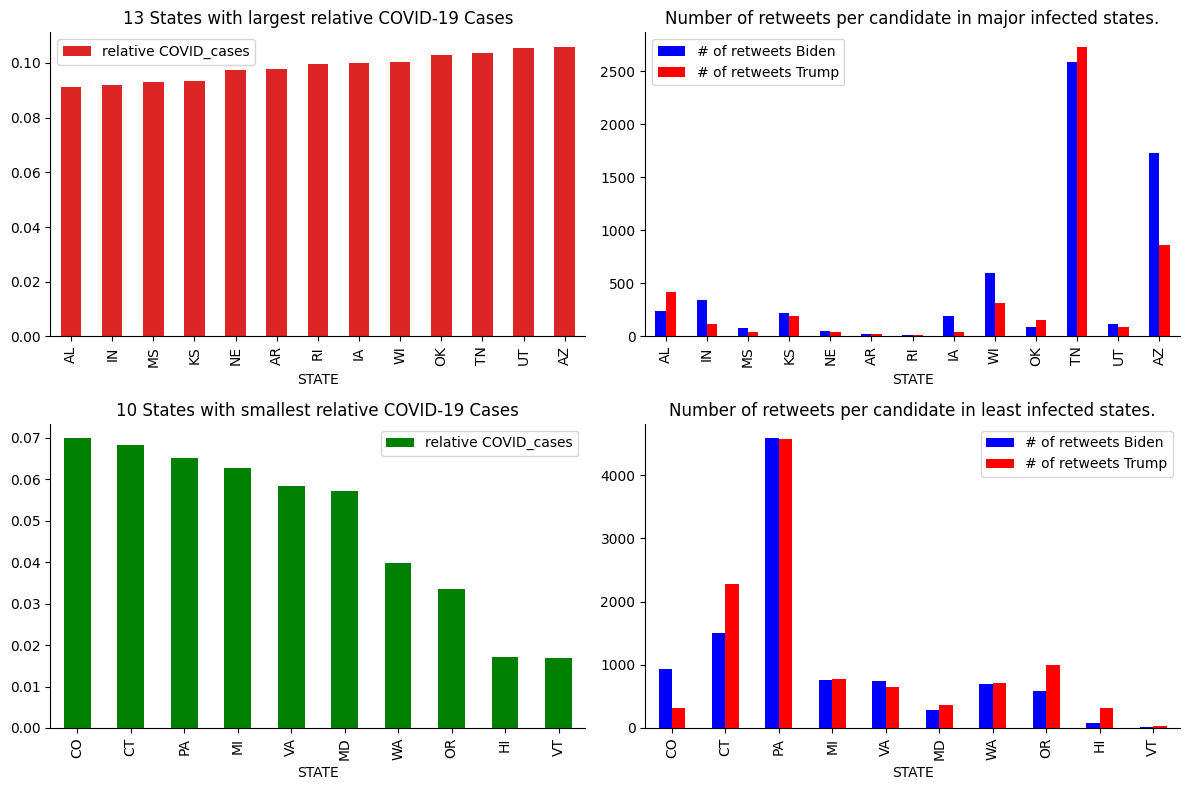

In [137]:

fig, ax = plt.subplots(figsize=(12,8) ,ncols=2, nrows=2)

lrela_cov.plot.bar(x='STATE', y = ['relative COVID_cases'], color= ['#dd2525'], ax = ax[0][0])
ax[0][0].set_title('13 States with largest relative COVID-19 Cases')
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
fig.tight_layout()

lrela_cov.plot.bar(x='STATE', y = ['# of retweets Biden','# of retweets Trump'], color= ['blue','red'], ax = ax[0][1])
ax[0][1].set_title('Number of retweets per candidate in major infected states.')
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
fig.tight_layout()


srela_cov.plot.bar(x='STATE', y = ['relative COVID_cases'], color= ['Green'], ax = ax[1][0])
ax[1][0].set_title('10 States with smallest relative COVID-19 Cases')
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
fig.tight_layout()

srela_cov.plot.bar(x='STATE', y = ['# of retweets Biden','# of retweets Trump'], color= ['blue','red'], ax = ax[1][1])
ax[1][1].set_title('Number of retweets per candidate in least infected states.')
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
fig.tight_layout()


Our first observation is that the higher relative COVID-19 cases mostly occur in small states, with lower population and lower income per capita like Alabama (AL), Tennessee (TN), Utah (UT). These are also the states where Donald Trump won the popular and electoral votes. The analysis of retweets however, gives us a different perspective. The relative number of retweets are actually much smaller that other major states like New York or Texas, but also for most states apart from Alabama and Tennessee most states interacted more with tweets mentioning Biden then Trump.

As for the states with lower relative COVID-19 cases, we see that people interacted more with Tweets mentioning Trump then Biden, like we see for Colorado (CO) or Maryland (MD).  A pattern emerges where the states mostly impacted by COVID interact more with Biden’s Tweets and the least impacte interact with Trump. This can be explained by the fact that president Trump was a big sceptic of COVID-19. He did not believe that the pandamic was a big deal and wanted to end lockdowns throughout the countries. It is then obvious that states that were least impacted by COVID at that time would agree/relate more to him then Biden. For the States most impacted, many states actually did interacted more with Joe Biden’s tweets. Even if many, then ended up voting for Trump. 

In order to build the map we first need to merge our new findings into the data_set containing map Geometries. We then run two heatmaps, one with popular Vote in Contenental US and other with relative COVID-19 cases in US.

In [138]:
USA_w_outcome = USA.merge(outcome1, left_on='STUSPS', right_on='STATE',how='left')

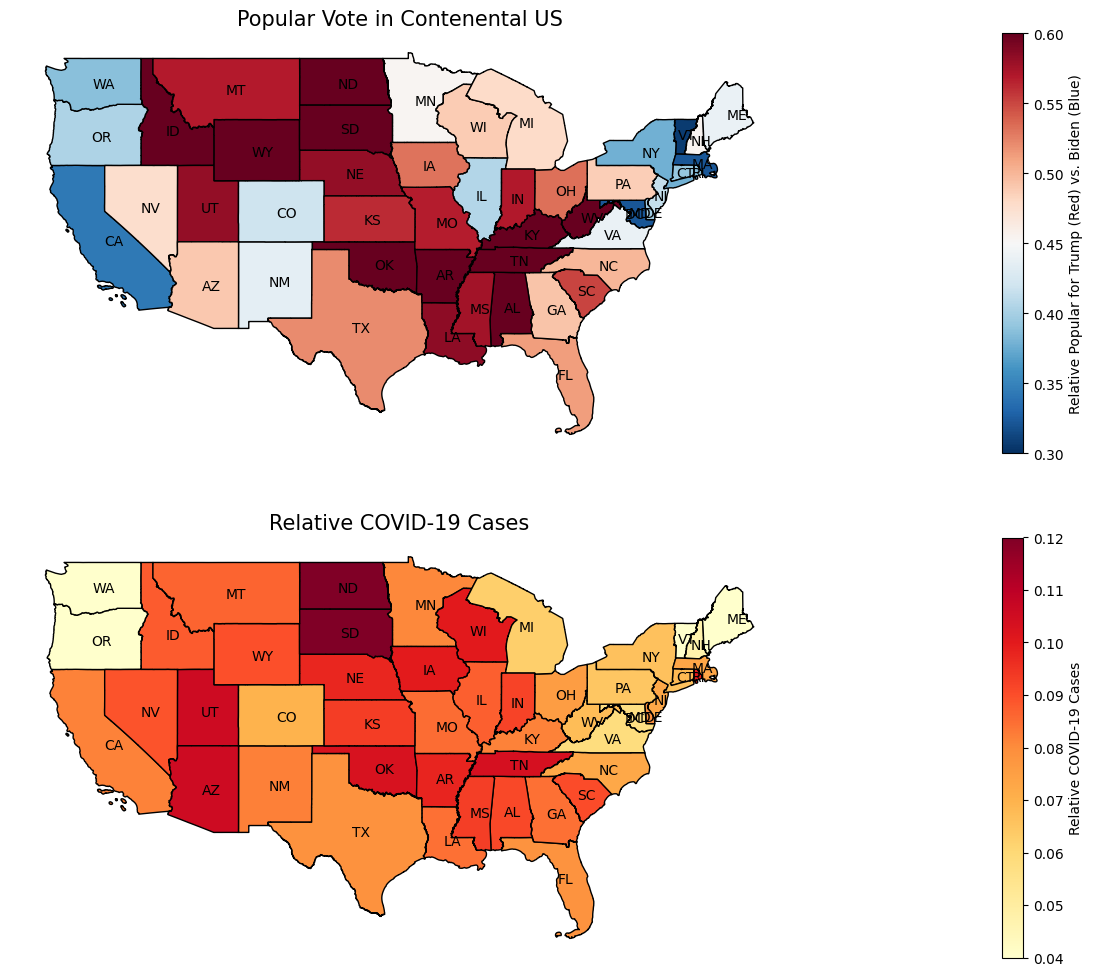

In [139]:
fig, hax = plt.subplots(figsize = (55,12), ncols=1,nrows=2)

# Plot the state
#USA.plot(ax=gax, edgecolor='black',color='white')
USA_w_outcome.plot(ax=hax[0], column = 'relative Popular Vote Trump' 
                   ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative Popular for Trump (Red) vs. Biden (Blue)'},
                   cmap='RdBu_r',vmin=0.3, vmax=0.6)
USA_w_outcome.plot(ax=hax[1],column = 'relative COVID_cases' ,edgecolor = 'Black',legend=True, legend_kwds={'label':'Relative COVID-19 Cases'},
                   cmap='YlOrRd',vmin=0.04, vmax=0.12)

hax[0].set_title('Popular Vote in Contenental US'
                 ,fontsize=15)
hax[1].set_title('Relative COVID-19 Cases'
                 ,fontsize=15)

hax[0].axis('off')
hax[1].axis('off')
for x, y, label in zip(name['Coordinates'].x, name['Coordinates'].y, name['STUSPS']):
    hax[0].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')
    hax[1].annotate(label, xy=(x,y), xytext=(-4,-4),textcoords='offset points')

In the voter outcome a different pattern emerges where states mostly affected by COVID at that time were more likely to vote for Trump then Biden. Even if in the Twitter data we aw that the pattern was slightly differentwere states affected by COVID-19 interacted more with Biden rather then Trump. This shows a disconnect between what can be analysed with Twitter analytic data and the true sentament of voters.

## OLS Regression

Before running our OLS regression, we would need to have enough observation to have good enough estimates, and small standard errors thanks to law of large numbers. To obtain that, we will initially, run our regression at county level then state level. In our Twitter data however, we do not have the column with county name, which means we need to obtain that information from the longitude and latitude information and through map overlay. 

First, we will gather county level data from http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip

In [140]:
county_df = gpd.read_file("/Users/maseehfaizan/Desktop/cb_2016_us_county_5m")


In [141]:
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [142]:
county_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Once we know about the crs code we are overlaying that data similar to overlaying a map over another to spot the county names through longitude and latitude coordinates.

In [143]:
main_gdf = gpd.GeoDataFrame(main_df, crs = 4269, geometry = "Coordinates")

In [144]:
merged_main = gpd.sjoin(main_gdf, county_df, op = "within")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [145]:
merged_main.head().transpose()

,0,4,10,15,24
created_at,2020-10-15 00:00:02,2020-10-15 00:01:14,2020-10-15 00:02:14,2020-10-15 00:03:32,2020-10-15 00:07:01
tweet,"#Trump: As a student I used to hear for years,...","#Trump: Nobody likes to tell you this, but som...",I have lost track of what #Trump is talking ab...,"#Trump: You don't mind if I go off script, rig...",#Trump: One of the most important issues for I...
likes,2.0,1.0,2.0,3.0,1.0
retweet_count,1.0,1.0,1.0,1.0,1.0
user_name,snarke,snarke,snarke,snarke,snarke
user_join_date,2007-08-26 05:56:11,2007-08-26 05:56:11,2007-08-26 05:56:11,2007-08-26 05:56:11,2007-08-26 05:56:11
user_followers_count,1185.0,1185.0,1185.0,1185.0,1185.0
lat,45.520247,45.520247,45.520247,45.520247,45.520247
long,-122.674195,-122.674195,-122.674195,-122.674195,-122.674195
country,United States of America,United States of America,United States of America,United States of America,United States of America


We can see that the data was merged successfully and we have the state name alongside each tweet in our **main_df** data.

Similar to the state level data, we could like to have the county level outcome data, to know how each candidate, perform across counties. The data initially is very messy and contains data from 2000 to 2020 which means we would need to clean the data and only have data for year 2020.

The data was collected from Harvard data archive: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [146]:
count_outcome = pd.read_csv("/Users/maseehfaizan/Desktop/data/countypres_2000-2020.csv")
count_outcome.head(8)

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL
5,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,40872,56480,20220315,TOTAL
6,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,RALPH NADER,GREEN,1033,56480,20220315,TOTAL
7,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,OTHER,OTHER,578,56480,20220315,TOTAL


In [147]:
count_outcome = count_outcome[count_outcome["year"] == 2020]

In [148]:
count_outcome = count_outcome.drop(count_outcome[count_outcome['party'] == "OTHER"].index)

To have uniformity we would like to name both of the candidate with similar name, Joe Biden and Donald Trump

In [149]:
count_outcome['candidate'] = count_outcome['candidate'].str.replace('JOSEPH R BIDEN JR','Joe Biden')
count_outcome['candidate'] = count_outcome['candidate'].str.replace('DONALD J TRUMP','Donald Trump')

We are now separating both candidate into two different dataframes and then merge them again. We are doing this to have individual columns for both candidates and not have them in rows, which is harder to analyse and different from previous analysis.

In [150]:
trump_county = count_outcome.drop(count_outcome[count_outcome['party'] == "DEMOCRAT"].index)
trump_county ['relvotes_Trump'] = trump_county ['candidatevotes']/trump_county['totalvotes']

In [151]:
biden_county = count_outcome.drop(count_outcome[count_outcome['party'] == "REPUBLICAN"].index)
biden_county['relvotes_Biden'] = biden_county['candidatevotes']/biden_county['totalvotes']


In [152]:
count_outcome = biden_county.merge(trump_county, left_index = True,right_index = True, how = "outer", suffixes = ('','_y'))
count_outcome.drop(count_outcome.filter(regex='_y$').columns, axis = 1,inplace = True)

In [153]:
count_outcome = count_outcome.drop(['candidate','party','candidatevotes'],axis=1)
count_outcome.head(4)

,year,state,state_po,county_name,county_fips,office,totalvotes,version,mode,relvotes_Biden,relvotes_Trump
50524,2020.0,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,27770.0,20220315.0,TOTAL,0.270184,NaN
50526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714368
50527,2020.0,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,109679.0,20220315.0,TOTAL,0.224090,NaN
50529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761714


After the merging process, relative Trump vote is downshifted by one row uniformly. We can shift the whole column up by one row and drop all the empty rows in between. By doing so we now have a main, county level dataframe with initially relative biden votes and relative Trump votes included in them.

In [154]:
count_outcome.relvotes_Trump = count_outcome.relvotes_Trump.shift(-1)
count_outcome = count_outcome.dropna()

Through our initial relative vote data we are now computing total voter outcome.

In [155]:
count_outcome['Total_vote_biden'] = count_outcome['relvotes_Biden'] * count_outcome['totalvotes']

In [156]:
count_outcome['Total_vote_trump'] = count_outcome['relvotes_Trump'] * count_outcome['totalvotes']

Similar to the state level computation, we are seperating the county level data for each candidate. We will then computer the number of tweets, likes and retweets for each candidate, rename the column so we can differentiate the count between different candidates.

In [157]:
biden_df = merged_main[merged_main["Canditate"] != "Donald Trump"]
trump_df = merged_main[merged_main["Canditate"] == "Donald Trump"]

In [158]:
biden_tweet = biden_df.groupby('NAME')['tweet'].count()
biden_tweet = pd.DataFrame([biden_tweet])
biden_tweet = biden_tweet.transpose()
biden_tweet = biden_tweet.reset_index().rename(columns={'tweet':'num_biden_tweet'})

biden_like = biden_df.groupby('NAME')['likes'].sum()
biden_like = pd.DataFrame([biden_like])
biden_like = biden_like.transpose()
biden_like = biden_like.reset_index().rename(columns={'likes':'num_biden_likes'})

biden_retweet = biden_df.groupby('NAME')['retweet_count'].sum()
biden_retweet = pd.DataFrame([biden_retweet])
biden_retweet = biden_retweet.transpose()
biden_retweet = biden_retweet.reset_index().rename(columns={'retweet_count':'num_biden_retweets'})



In [159]:
trump_tweet = trump_df.groupby('NAME')['tweet'].count()
trump_tweet = pd.DataFrame([trump_tweet])
trump_tweet = trump_tweet.transpose()
trump_tweet = trump_tweet.reset_index().rename(columns={'tweet':'num_trump_tweet'})

trump_like = trump_df.groupby('NAME')['likes'].sum()
trump_like = pd.DataFrame([trump_like])
trump_like = trump_like.transpose()
trump_like = trump_like.reset_index().rename(columns={'likes':'num_trump_likes'})

trump_retweet = trump_df.groupby('NAME')['retweet_count'].sum()
trump_retweet = pd.DataFrame([trump_retweet])
trump_retweet = trump_retweet.transpose()
trump_retweet = trump_retweet.reset_index().rename(columns={'retweet_count':'num_trump_retweets'})

In [160]:
trump_tweet.head(5)

,NAME,num_trump_tweet
0,Ada,303
1,Adams,4
2,Aiken,2
3,Alachua,85
4,Alameda,1455


Before we try to merge different twitter results we need to have the county names to be written similarly which is why we will capitalise the name to match that of the Twitter name Data.

In [161]:
count_outcome['county_name'] = count_outcome['county_name'].str.capitalize()

In [162]:
count_outcome.head()

,year,state,state_po,county_name,county_fips,office,totalvotes,version,mode,relvotes_Biden,relvotes_Trump,Total_vote_biden,Total_vote_trump
50524,2020.0,ALABAMA,AL,Autauga,1001.0,US PRESIDENT,27770.0,20220315.0,TOTAL,0.270184,0.714368,7503.0,19838.0
50527,2020.0,ALABAMA,AL,Baldwin,1003.0,US PRESIDENT,109679.0,20220315.0,TOTAL,0.224090,0.761714,24578.0,83544.0
50530,2020.0,ALABAMA,AL,Barbour,1005.0,US PRESIDENT,10518.0,20220315.0,TOTAL,0.457882,0.534512,4816.0,5622.0
50533,2020.0,ALABAMA,AL,Bibb,1007.0,US PRESIDENT,9595.0,20220315.0,TOTAL,0.206983,0.784263,1986.0,7525.0
50536,2020.0,ALABAMA,AL,Blount,1009.0,US PRESIDENT,27588.0,20220315.0,TOTAL,0.095694,0.895716,2640.0,24711.0


Now we are able to merge the data and drop the redundant column names.

**Number of tweets**

In [163]:
count_outcome = count_outcome.merge(biden_tweet, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.merge(trump_tweet, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.drop(['NAME_x','NAME_y'],axis=1)

**Number of Retweets**

In [164]:
count_outcome = count_outcome.merge(trump_retweet, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.merge(biden_retweet, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.drop(['NAME_x','NAME_y'],axis=1)

**Number of likes**

In [165]:
count_outcome = count_outcome.merge(trump_like, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.merge(biden_like, left_on = "county_name", right_on = "NAME", how= "left")
count_outcome = count_outcome.drop(['NAME_x','NAME_y'],axis=1)

In [166]:
count_outcome.head(5)

,year,state,state_po,county_name,county_fips,office,totalvotes,version,mode,relvotes_Biden,relvotes_Trump,Total_vote_biden,Total_vote_trump,num_biden_tweet,num_trump_tweet,num_trump_retweets,num_biden_retweets,num_trump_likes,num_biden_likes
0,2020.0,ALABAMA,AL,Autauga,1001.0,US PRESIDENT,27770.0,20220315.0,TOTAL,0.270184,0.714368,7503.0,19838.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,ALABAMA,AL,Baldwin,1003.0,US PRESIDENT,109679.0,20220315.0,TOTAL,0.224090,0.761714,24578.0,83544.0,1.0,NaN,NaN,0.0,NaN,0.0
2,2020.0,ALABAMA,AL,Barbour,1005.0,US PRESIDENT,10518.0,20220315.0,TOTAL,0.457882,0.534512,4816.0,5622.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,ALABAMA,AL,Bibb,1007.0,US PRESIDENT,9595.0,20220315.0,TOTAL,0.206983,0.784263,1986.0,7525.0,15.0,9.0,11.0,8.0,17.0,19.0
4,2020.0,ALABAMA,AL,Blount,1009.0,US PRESIDENT,27588.0,20220315.0,TOTAL,0.095694,0.895716,2640.0,24711.0,NaN,NaN,NaN,NaN,NaN,NaN


We can see that for many counties, we do not have any tweets or retweets. So instead of filling them by 0 which will create a bias in our regression towards zero, we will just drop those data, and try to estimate the regression for the counties where we do have data.

In [167]:
count_outcome = count_outcome.dropna()

In [168]:
count_outcome.head(5)

,year,state,state_po,county_name,county_fips,office,totalvotes,version,mode,relvotes_Biden,relvotes_Trump,Total_vote_biden,Total_vote_trump,num_biden_tweet,num_trump_tweet,num_trump_retweets,num_biden_retweets,num_trump_likes,num_biden_likes
3,2020.0,ALABAMA,AL,Bibb,1007.0,US PRESIDENT,9595.0,20220315.0,TOTAL,0.206983,0.784263,1986.0,7525.0,15.0,9.0,11.0,8.0,17.0,19.0
7,2020.0,ALABAMA,AL,Calhoun,1015.0,US PRESIDENT,50983.0,20220315.0,TOTAL,0.298452,0.688484,15216.0,35101.0,25.0,3.0,0.0,3.0,1.0,21.0
12,2020.0,ALABAMA,AL,Clarke,1025.0,US PRESIDENT,13135.0,20220315.0,TOTAL,0.438142,0.557594,5755.0,7324.0,3.0,3.0,1.0,1.0,9.0,9.0
23,2020.0,ALABAMA,AL,Dallas,1047.0,US PRESIDENT,17864.0,20220315.0,TOTAL,0.684617,0.309225,12230.0,5524.0,1562.0,1439.0,3972.0,2274.0,12825.0,10890.0
26,2020.0,ALABAMA,AL,Escambia,1053.0,US PRESIDENT,15910.0,20220315.0,TOTAL,0.309114,0.683155,4918.0,10869.0,44.0,168.0,141.0,7.0,294.0,33.0


## Regression for voter outcome at county level

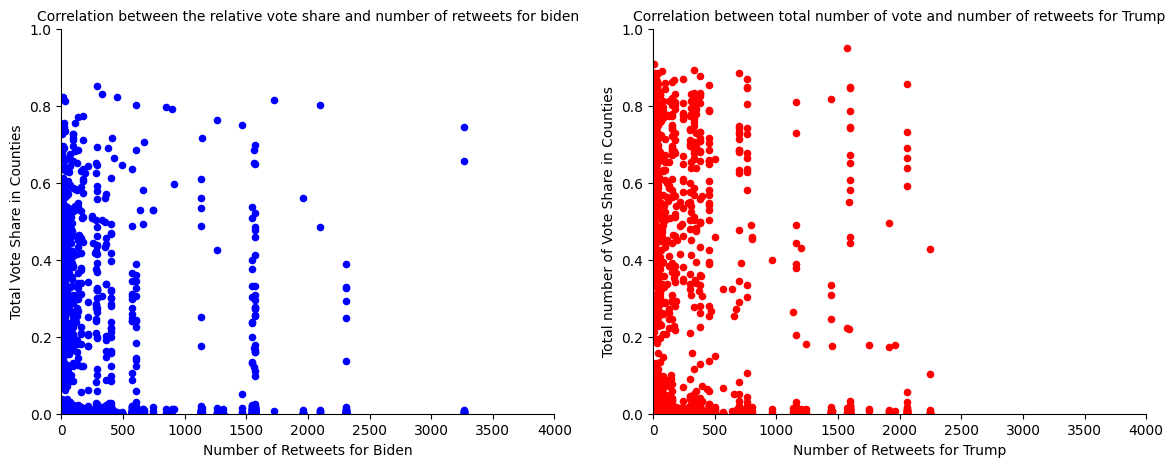

In [169]:
fig, ax = plt.subplots(figsize = (14,5), ncols = 2, nrows = 1)

count_outcome.plot(ax = ax[0] ,x='num_biden_tweet',y='relvotes_Biden',kind='scatter', xlim=(0,4000),ylim=(0,1), color = "b")
ax[0].set_title('Correlation between the relative vote share and number of retweets for biden',fontsize=10)
ax[0].set_xlabel("Number of Retweets for Biden")
ax[0].set_ylabel("Total Vote Share in Counties")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

count_outcome.plot(ax = ax[1] ,x='num_trump_tweet',y='relvotes_Trump',kind='scatter', xlim=(0,4000),ylim=(0,1), color = "r")
ax[1].set_title('Correlation between total number of vote and number of retweets for Trump',fontsize=10)
ax[1].set_xlabel("Number of Retweets for Trump")
ax[1].set_ylabel("Total number of Vote Share in Counties")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

As seen in the previous analysis, the retweet count or the number of interaction that people had with the tweets, was able to better predict the outcome at state level. We will now run a regression at county level and see how will will it be able to predict the election outcome. 

Before we run any regressions, we would first want to have initial idea of the data at county level. In this case we will look into a scatter plot and see weather the data is linear or non-linear. Our initial impression doesn’t tell us much. Looking at the data we are unable to say wether the data is linear or non-linear. The data is scatter very close to zero. Most of the data is close to zero retweet count even though the relative outcome spreads widely across the spectrum. This might be because at county level, we have very few tweets and retweets data. Even if some tweets gets a lot of traction in terms or retweets, the majority lay close to zero.

In [170]:
count_outcome['const'] = 1

Xb1 = ['const','num_biden_tweet']
Xb2 = ['const','num_biden_tweet','num_biden_retweets']

regb1 = sm.OLS(count_outcome['Total_vote_biden'], count_outcome[Xb1], missing='drop').fit()
regb2 = sm.OLS(count_outcome['Total_vote_biden'], count_outcome[Xb2], missing='drop').fit()


In [171]:
count_outcome['const'] = 1

Xt1 = ['const','num_trump_tweet']
Xt2 = ['const','num_trump_tweet','num_trump_retweets']

regt1 = sm.OLS(count_outcome['Total_vote_trump'], count_outcome[Xb1], missing='drop').fit()
regt2 = sm.OLS(count_outcome['Total_vote_trump'], count_outcome[Xb2], missing='drop').fit()


In [177]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared': lambda x:f"{x.rsquared:.2f}",
          'NO. observations': lambda x: f"{int(x.nobs):d}"}

We are now running the following regression for both of our candidate:
$$
{outcome}_i = \beta_0 + \beta_1 {Numtweet}_i + \beta_2 {Numretweet}_i + u_i
$$

For each county and for each candidate seperately 

In [178]:
results_table_county = summary_col(results = [regb1, regb2, regt1, regt2],
                                  stars = True,
                                  model_names=['Model 1 Biden',
                                              'Model 2 Biden',
                                              'Model 1 Trump',
                                              'Model 2 Trump'],
                                  info_dict = info_dict,
                                  regressor_order=['num_biden_tweet','num_trump_tweet',
                                                   'num_biden_retweets','num_trump_retweets',
                                                   'const'])
                                  
print(results_table_county)


                     Model 1 Biden   Model 2 Biden   Model 1 Trump   Model 2 Trump 
-----------------------------------------------------------------------------------
const               1447144.5401*** 1279715.9629*** 1395449.9243*** 1289771.8105***
                    (267718.3544)   (266749.3084)   (203986.4591)   (204497.5922)  
# of retweets Biden 19.1286**       109.0589***                                    
                    (8.8502)        (39.9342)                                      
# of retweets Trump                                 13.5636         76.5136**      
                                                    (8.4226)        (32.1665)      
retweets_biden2                     -0.0006**                                      
                                    (0.0002)                                       
retweets_trump2                                                     -0.0005**      
                                                                    (0.0002

### Regression interpretation:

As seen in the regression data, We can see that the data is quite similar for both our candidate. We have our intercept around 8’800, which is the average number of votes each candidate gets per county. We can then see that the number of tweet only adds around 21 extra vote count per county for Biden and only 10 extra votes for Trump. In other words, having higher number of tweets will give candidate around 10 to 20 extra votes. This data is statistically significant at 1% significance level, but we can see that it is not economically significant. Since the number of votes only explain 10-20 votes out of 8000, we cannot be confident in the number of tweets to predict election outcome for any candidate at each county. Moreover the number of retweets holding the number of tweets constant has even lower score of predicting the number of voter outcome in each county. It is only able to predict 5 extra votes per retweets for Biden and around 2 extra votes per retweet for Trump, which is quite low.

## Regression for voter outcome at state level

In this part we are regressiong for voter outcome at the state level for both our candidates

$$
\widehat{voteroutcome}_i = \beta_0 + \beta_1{numretweets} + \beta_2{numberretweet}^2 + \beta_3{income}  u_i
$$

We are running the regression one by one eachtime controling for one extra variable. Furthermore we are running the regression seperately for each candidate.

In [179]:
outcome1['const'] = 1
outcome1['retweets_biden2'] = outcome1['# of retweets Biden'] * outcome1['# of retweets Biden']

Xb1 = ['const','# of retweets Biden']
Xb2 = ['const','# of retweets Biden','retweets_biden2']
Xb3 = ['const','# of retweets Biden','retweets_biden2','Per capita income (2020) BEA']

regb1 = sm.OLS(outcome1['Popular Vote - Biden'], outcome1[Xb1], missing='drop').fit()
regb2 = sm.OLS(outcome1['Popular Vote - Biden'], outcome1[Xb2], missing='drop').fit()
regb3 = sm.OLS(outcome1['Popular Vote - Biden'], outcome1[Xb3], missing='drop').fit()

In [180]:
outcome1['const'] = 1
outcome1['retweets_trump2'] = outcome1['# of retweets Trump'] * outcome1['# of retweets Trump']

Xt1 = ['const','# of retweets Trump']
Xt2 = ['const','# of retweets Trump','retweets_trump2']
Xt3 = ['const','# of retweets Trump','retweets_trump2','Per capita income (2020) BEA']

regt1 = sm.OLS(outcome1['Popular Vote - Trump'], outcome1[Xt1], missing='drop').fit()
regt2 = sm.OLS(outcome1['Popular Vote - Trump'], outcome1[Xt2], missing='drop').fit()
regt3 = sm.OLS(outcome1['Popular Vote - Trump'], outcome1[Xt3], missing='drop').fit()

I tried to run latex format and copied and pasted the code but  the table was always cut in the middle or was simply unusable.

In [200]:
results_table_state = summary_col(results = [regb1, regb2,regb3, regt1, regt2,regt3],
                                  stars = True,
                                  model_names=['Model 1 Biden',
                                              'Model 2 Biden',
                                               'Model 3 Biden',
                                              'Model 1 Trump',
                                              'Model 2 Trump',
                                              'Model 3 Trump'],
                                  info_dict = info_dict,
                                  regressor_order=['# of retweets Biden','# of retweets Trump',
                                                   'retweets_biden2', 'retweets_trump2',
                                                   'Per capita income (2020) BEA',
                                                   'const'])


print(results_table_state)
                                  
#stargazer = Stargazer([regb1, regb2,regb3, regt1, regt2,regt3])
#print(stargazer.render_latex())



                              Model 1 Biden   Model 2 Biden  Model 3 Biden   Model 1 Trump   Model 2 Trump  Model 3 Trump 
--------------------------------------------------------------------------------------------------------------------------
# of retweets Biden          19.1286**       109.0589***     98.8062**                                                    
                             (8.8502)        (39.9342)       (43.0047)                                                    
# of retweets Trump                                                         13.5636         76.5136**       95.8048***    
                                                                            (8.4226)        (32.1665)       (35.5000)     
retweets_biden2                              -0.0006**       -0.0005**                                                    
                                             (0.0002)        (0.0003)                                                     
retweets_trump2

### Data interpretation

Before analyzing and interpreting the data, one should note that in this data, we only have 50 to 51 Observation, which represents each states. Since most of our previous analysis was at state level, where we were able to gather all the relative data, in terms of income per capita in each state, number of tweets and retweets to predict each states election outcome. This also means that the following table has regression with low observations which might lead to some biases in some cases. 

In model 1 for Biden, with no retweet count (i.e, the constant in our regression) shows that the average vote for Biden is at 1’447’144 when the number of retweet is at zero. with our Number of retweets coefficient we can see that a unit increase of retweet has the impact of increasing voter outcome by 19.12 votes. Both our coefficients are statistically significant at 5% confidence interval. However, the coefficient in the number of retweets has relatively low economic significance. We would need a fairly high retweet count for the coefficient to be significant. This is not the case for most rural states. In certain states like New York or Washington DC  however, were the number of retweet is high the coefficient can have practical significance. Looking in Model 1 Trump, we can see a similar phenomena happening, where the coefficient for the number of retweets trump is even lower and has no statistical significance since the standard errors is fairly high. Looking at the R-Squared, we can see that there is a fairly low correlation between number of retweets and voter outcome.

In Model 2, we can see that our R-Squared coefficient is higher, which means that our hypothesis is true that the regression is non-linear. In other words there is a non-linear relationship between voter outcome and the number of retweets that the tweet of each candidate, gets. The number of retweets coefficient is now much higher. For example in Model 2 Biden we can see that an extra retweet is associated with 109 extra votes, which with large enough number of retweets can be considered as economically significant. Once, again all of our coefficient in model 2 regressions are also statistically signifiant, even with low number of observation.

Finally in model 3 we are also controlling for the income effect. As seen in previous analysis, income is highly correlated with relative vote share, with higher income states voting for Biden and low income states voting for Trump. This is shown in model 3 with our per capita income. For Biden the coefficient is positive and is around 21, which means for a marginal increase in income per capita is associated with 21 extra votes and for Trump the coefficient is negative 30. The coefficient however are not statistically significant. This is because the income across states are fairly similar. The income does relate with voter outcome however, there is a lot of variation among states. For example Texas, is a high income state and voted for Trump which creates variability among states even if on average the relationship between income per capita and voter outcome is there.


# Conclusion
In summary we can see that, when looking into the United States data, eventhough Donald Trump has higher tweet count people interact more with Tweets related to Joe Biden. Looking into it we can draw a correlation between election outcome and the number of interactions on Tweets for instance likes and retweets. Looking deeper into our data we notice that these correlation hold at the country level. When looking at out heatplot, we see that at the state level there is little to no correlation between voter outcome of a candidate and the number of Likes and retweets that candidate gets. Our data suggests that throughout the country, with few exceptions, Biden overwhelmingly beats trump in every state if we look at Twitter Data soley. Meanwhile we cannot ruleout the fact that the tweets about Biden can be negative news which is shared more intensively throughout the countries. In other words Biden might be getting the majority of the traction on Twitter, but it might be negative traction. Moreover, other facts like income and how the states managed the spread of covid-19 can also shead a light onto our analysis. We can see that states with higher income are more likely to vote for Biden, and have relatively high interaction with tweets about Biden rather then Trump and the inverse is also true. We are also assuming that high income states are more urban then rural which means they rae alos more likely wo use new technology and social media plateforms like Twitter. The COVID-19 data also show that as the relative cases rises in certain state they tend to interact more with Biden's tweets and vise-versa. How ever this does not translate into actual votes. as seen in the plotted map in our analysis.




### Shortcomings

As for shortcomings that need to be improved, we need to enlarge our data set and include other social media where supporters of other candidates are also present. Looking soley at Twitter data, we notice a bias towards Joe Biden, because he apeals to younger more urban and politically left leaning demographic which happens to be the demographic of Twitter. By enriching the data set with other data from other social media, we might get a better more unbiased image.
When analysing the Twitter analytics data, which includes, the number of likes, retweets and tweets we can only have one version of the facts. To have a complete study we would then need to combine this analysis with sentimental analysis, which will give us a deeper understanding for the content of the tweets and we can then compare these analytics more carefully, by weighing them, for how positive or negative they are.
 